<a href="https://colab.research.google.com/github/yesung05/25-BDA-TeamDP/blob/main/25_BDA_BikeCrash_TeamDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자전거 사고 다발구간에서의 자전거 사고 분석

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
!pip install koreanize_matplotlib

In [59]:
import koreanize_matplotlib

In [60]:
%config InlineBackend.figure_format = 'retina'

In [61]:
!git clone https://github.com/yesung05/datas

fatal: destination path 'datas' already exists and is not an empty directory.


In [62]:
# 자전거 사고 데이터셋 불러오기
rData = pd.read_csv('datas/bike_data.csv', encoding = 'cp949') #rawData
rData.head(3)

,다발지구분,다발지시군구,지점명,발생일,발생시간대,사고내용,가해자성별,가해자연령,가해자차종,가해자신체상해정도,피해자성별,피해자연령,피해자차종,피해자신체상해정도,사고유형,법규위반사항,기상상태,사망자수,부상자수
0,2018년 다발지,서울특별시 종로구1,서울특별시 종로구 종로6가(흥인지문사거리 부근),2018-03-23,07시,경상,남,59세,자전거,상해없음,남,40세,보행자,경상,차대사람 - 횡단중,신호위반,맑음,0,5
1,2018년 다발지,서울특별시 종로구1,서울특별시 종로구 종로6가(흥인지문사거리 부근),2018-03-25,17시,부상신고,남,57세,자전거,부상신고,남,75세,승용차,상해없음,차대차 - 측면충돌,신호위반,맑음,0,5
2,2018년 다발지,서울특별시 종로구1,서울특별시 종로구 종로6가(흥인지문사거리 부근),2018-06-23,14시,중상,남,78세,자전거,중상,남,63세,승용차,상해없음,차대차 - 측면충돌,신호위반,맑음,0,5


In [63]:
# 데이터프레임의 행과 열 개수 확인
rData.shape

(4916, 19)

In [64]:
# 데이터프레임의 컬럼별 타입 및 결측치 확인
rData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   다발지구분      4916 non-null   object
 1   다발지시군구     4916 non-null   object
 2   지점명        4916 non-null   object
 3   발생일        4916 non-null   object
 4   발생시간대      4916 non-null   object
 5   사고내용       4916 non-null   object
 6   가해자성별      4916 non-null   object
 7   가해자연령      4916 non-null   object
 8   가해자차종      4916 non-null   object
 9   가해자신체상해정도  4916 non-null   object
 10  피해자성별      4916 non-null   object
 11  피해자연령      4916 non-null   object
 12  피해자차종      4916 non-null   object
 13  피해자신체상해정도  4916 non-null   object
 14  사고유형       4916 non-null   object
 15  법규위반사항     4916 non-null   object
 16  기상상태       4916 non-null   object
 17  사망자수       4916 non-null   int64 
 18  부상자수       4916 non-null   int64 
dtypes: int64(2), object(17)
memory usage: 729.8+ KB


In [65]:
# 수치형 변수의 기초 통계량 확인
rData.describe()

,사망자수,부상자수
count,4916.00,4916.00
mean,0.07,5.75
std,0.26,1.95
min,0.00,2.00
25%,0.00,4.00
50%,0.00,5.00
75%,0.00,7.00
max,2.00,16.00


In [66]:
# 범주형 변수의 기초 통계량 확인
rData.describe(include = 'object')

,다발지구분,다발지시군구,지점명,발생일,발생시간대,사고내용,가해자성별,가해자연령,가해자차종,가해자신체상해정도,피해자성별,피해자연령,피해자차종,피해자신체상해정도,사고유형,법규위반사항,기상상태
count,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916
unique,3,461,930,1056,24,4,3,90,13,6,4,96,13,7,13,7,5
top,2019년 다발지,서울특별시 영등포구1,경기도 성남시 중원구 성남동(모란사거리 부근),2020-10-29,17시,경상,남,불명,자전거,상해없음,남,59세,자전거,경상,차대차 - 측면충돌,안전운전 의무 불이행,맑음
freq,1727,30,22,16,380,2631,3602,148,2201,3007,3365,136,3035,1918,2491,3169,4635


## 분석에 필요한 데이터로만 신규 데이터프레임 생성

In [67]:
df = pd.DataFrame()

In [68]:
df['Year'] = rData['발생일'].str.split("-").str[0].astype(int)
df['Month'] = rData['발생일'].str.split("-").str[1].astype(int)
df['Date'] = rData['발생일'].str.split("-").str[2].astype(int)
df['Time'] = rData['발생시간대'].str.replace("시", "").astype(int)
df['Place'] = rData['지점명']
df['accidentType'] = rData['사고유형']
df['accidentDetail'] = rData['사고내용']
df['weather'] = rData['기상상태']
df['dead'] = rData['사망자수']
df['hurt'] = rData['부상자수']
df['violation'] = rData['법규위반사항']

In [69]:
tempPrepAge = rData['가해자연령'].copy()
tempPrepAge = tempPrepAge.replace("불명", None)
tempPrepAge = tempPrepAge.str.replace("세", "")


df['prepAge'] = pd.to_numeric(tempPrepAge)
df['prepGender'] = rData['가해자성별']
df['prepVehicle'] = rData['가해자차종']
df['prepDamage'] = rData['가해자신체상해정도']



In [70]:
tempVictemAge = rData['피해자연령'].copy()
tempVictemAge = tempVictemAge.replace("불명", None)
tempVictemAge = tempVictemAge.replace("없음", None)
tempVictemAge = tempVictemAge.str.replace("세", "")

df['victemAge'] = pd.to_numeric(tempVictemAge)
df['victemGender'] = rData['피해자성별'].replace("없음", None)
df['victemVehicle'] = rData['피해자차종'].replace("없음", None)
df['victemDamage'] = rData['피해자신체상해정도'].replace("없음", None)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4916 non-null   int64  
 1   Month           4916 non-null   int64  
 2   Date            4916 non-null   int64  
 3   Time            4916 non-null   int64  
 4   Place           4916 non-null   object 
 5   accidentType    4916 non-null   object 
 6   accidentDetail  4916 non-null   object 
 7   weather         4916 non-null   object 
 8   dead            4916 non-null   int64  
 9   hurt            4916 non-null   int64  
 10  violation       4916 non-null   object 
 11  prepAge         4768 non-null   float64
 12  prepGender      4916 non-null   object 
 13  prepVehicle     4916 non-null   object 
 14  prepDamage      4916 non-null   object 
 15  victemAge       4838 non-null   float64
 16  victemGender    4862 non-null   object 
 17  victemVehicle   4862 non-null   o

In [72]:
df['accidentType'].describe()

,accidentType
count,4916
unique,13
top,차대차 - 측면충돌
freq,2491


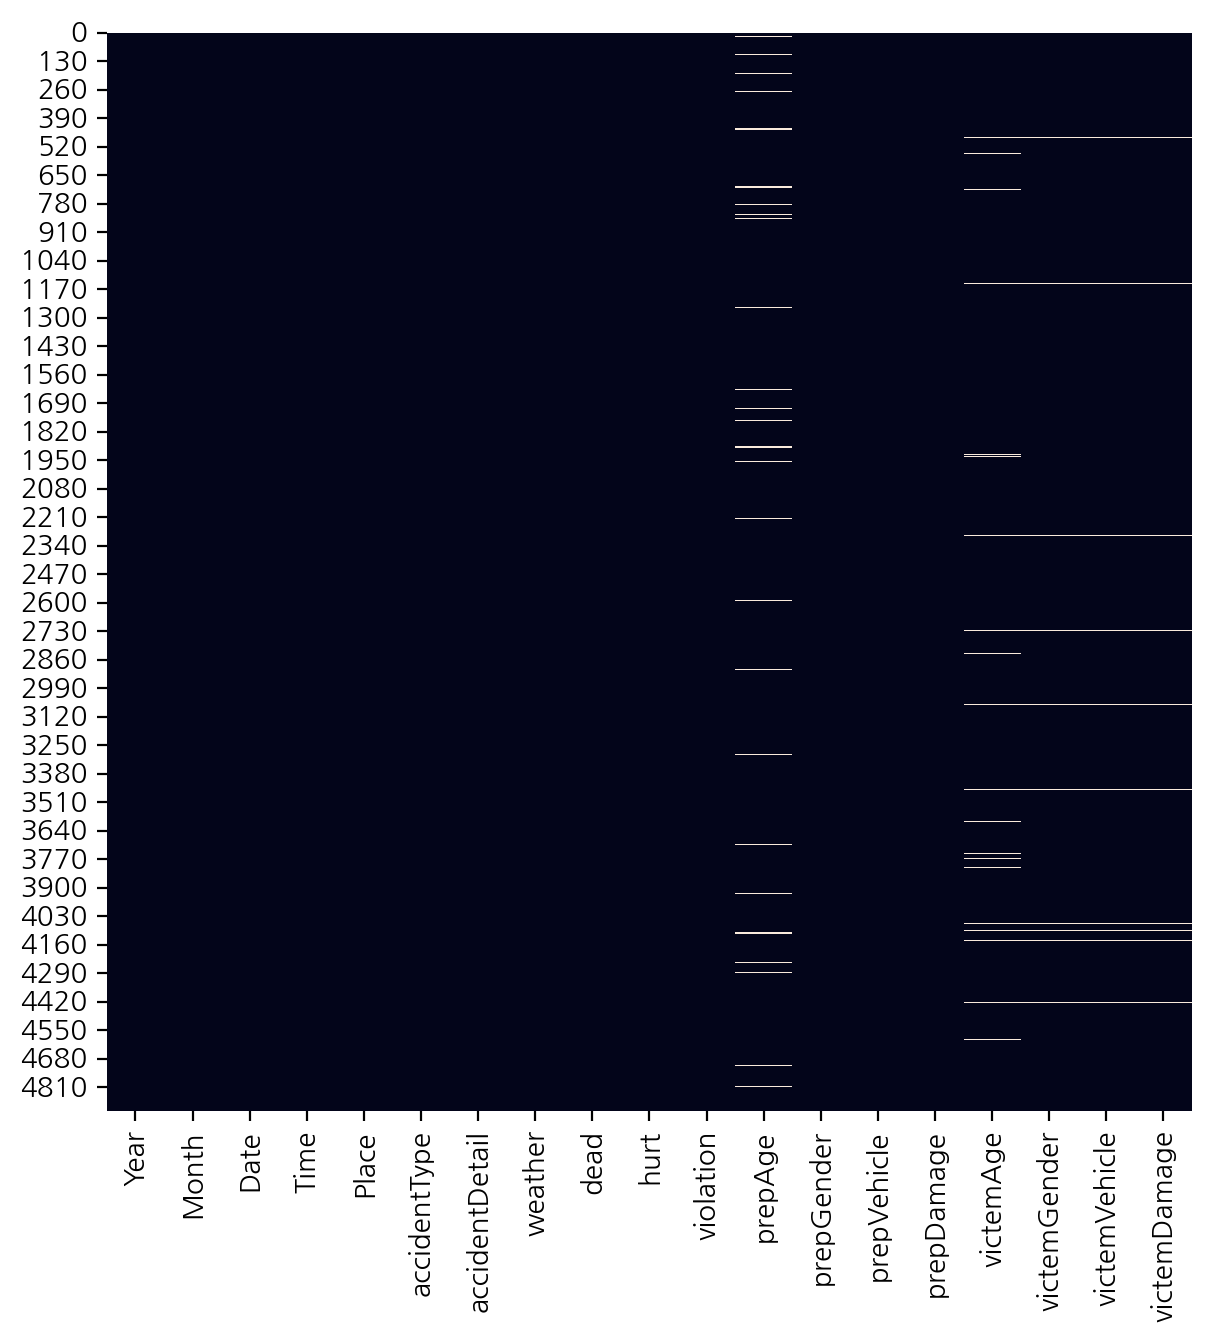

In [73]:
# 결측치 위치 히트맵 시각화
plt.figure(figsize = (7,7))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [74]:
df.accidentType.isna().sum()

np.int64(0)

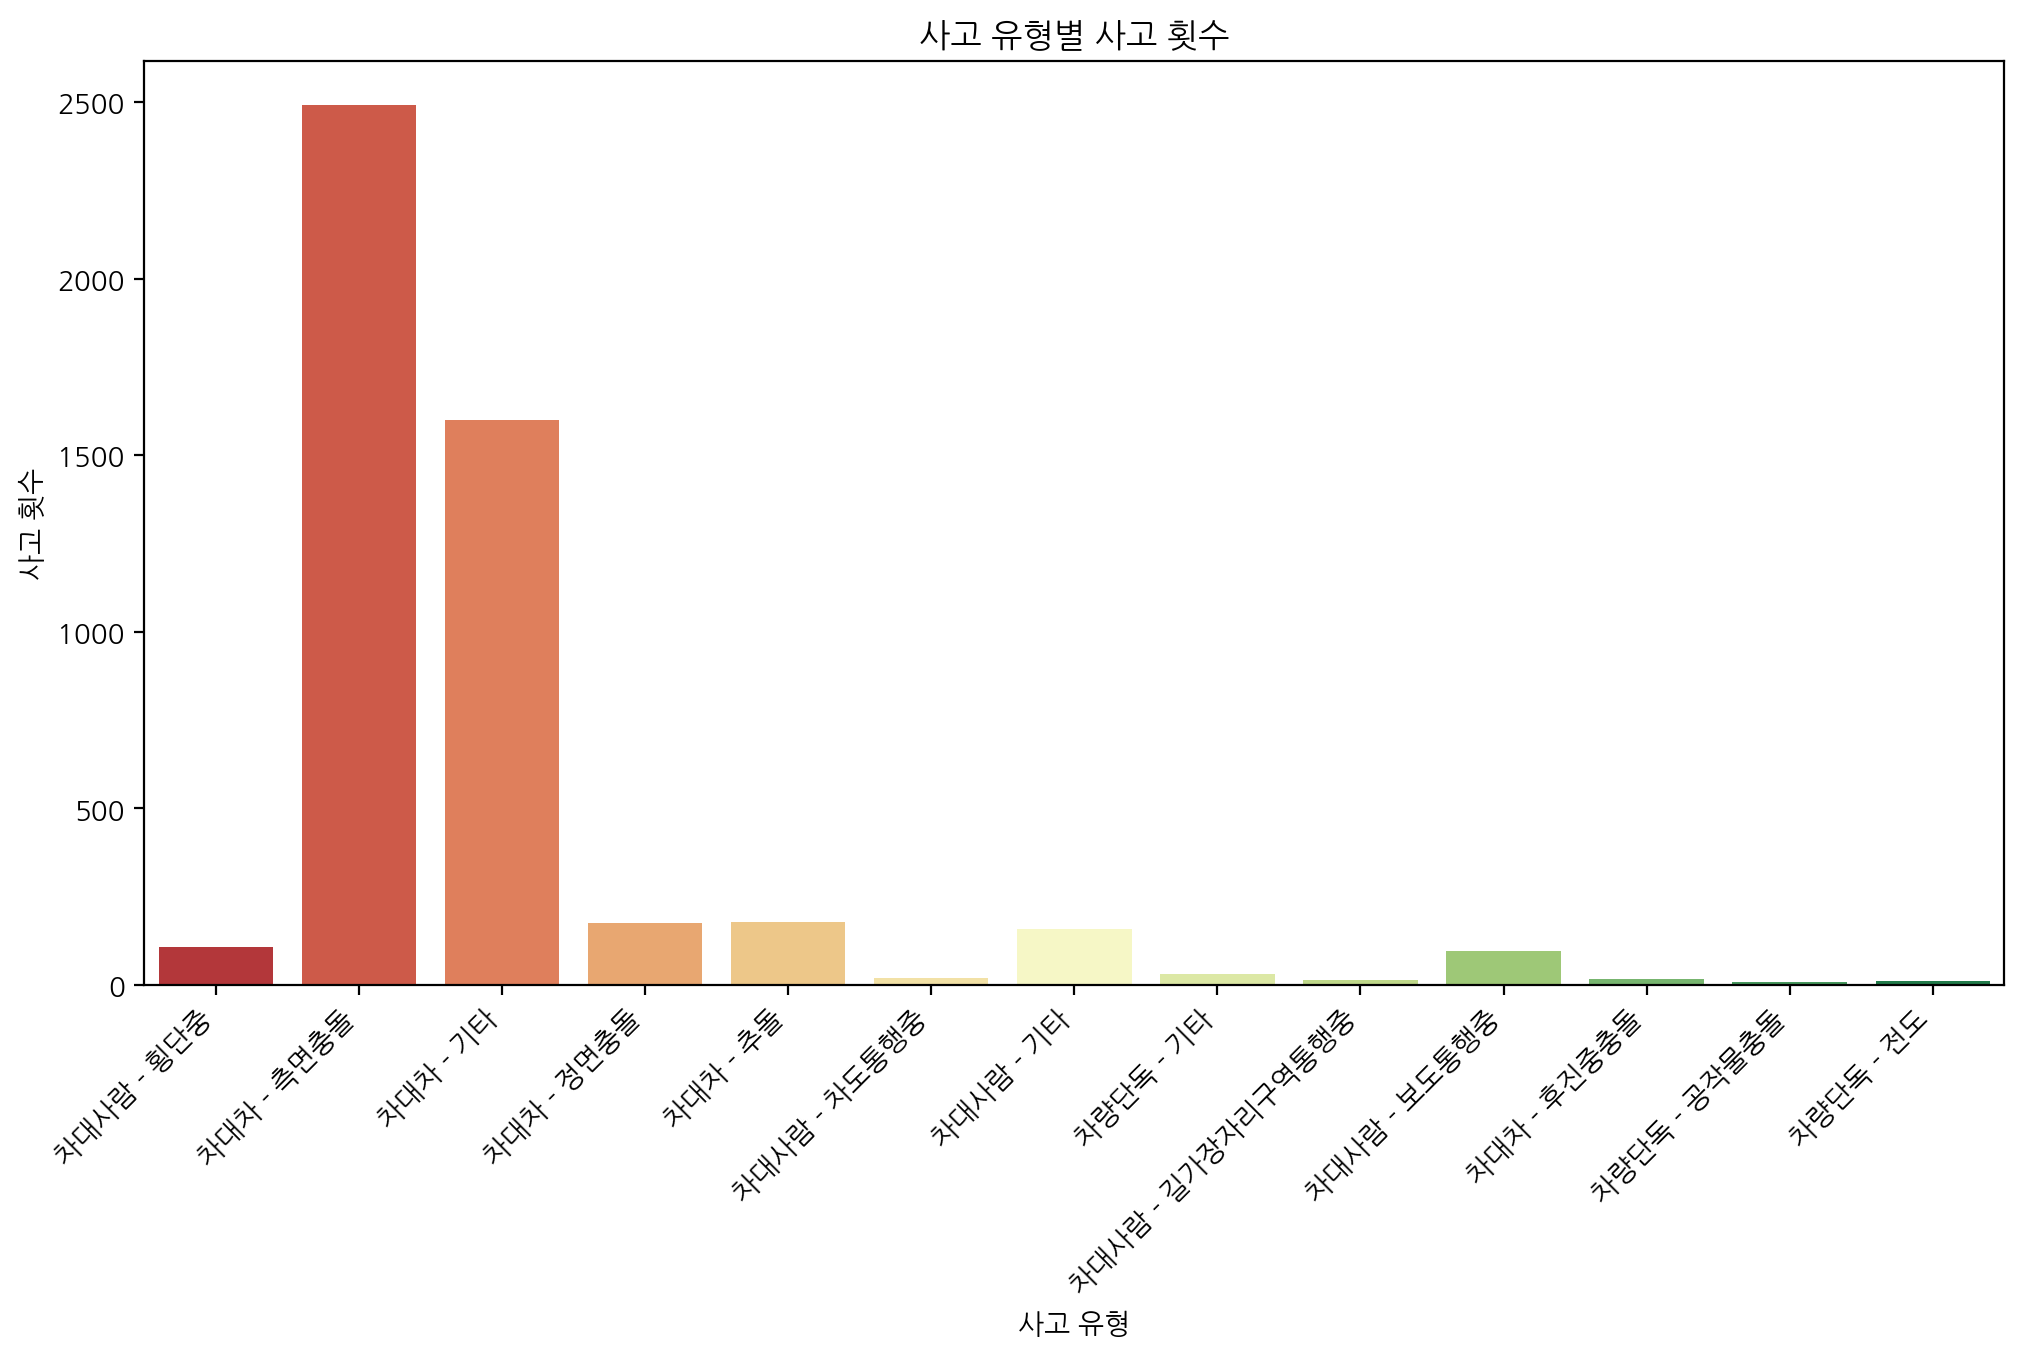

In [75]:
# 사고 유형별 발생 횟수를 시각화
# 어떤 유형의 자전거 사고가 가장 많이 발생했는지 분석

plt.figure(figsize = (12,6)) # 그래프 크기 설정
sns.countplot(data = df, x = 'accidentType', hue = 'accidentType', palette = 'RdYlGn') # x축: 사고 유형, 컬럼 기준 색 구분
# Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
# x와 hue에 같은 값 설정 경고
plt.xlabel("사고 유형") # x축 이름
plt.ylabel("사고 횟수") # y축 이름
plt.title("사고 유형별 사고 횟수") # 그래프 제목
plt.xticks(rotation = 45, ha = 'right') # x축 텍스트 각도 조정
plt.show()

# 차대차 사고 횟수가 가장 많고 그 중에서도 측면충돌의 횟수가 압도적으로 높음

## 5월, 10월등 선선한 날씨에 자전거 이용이 많아져서 이에 따라 사고가 늘어나는 듯 보임


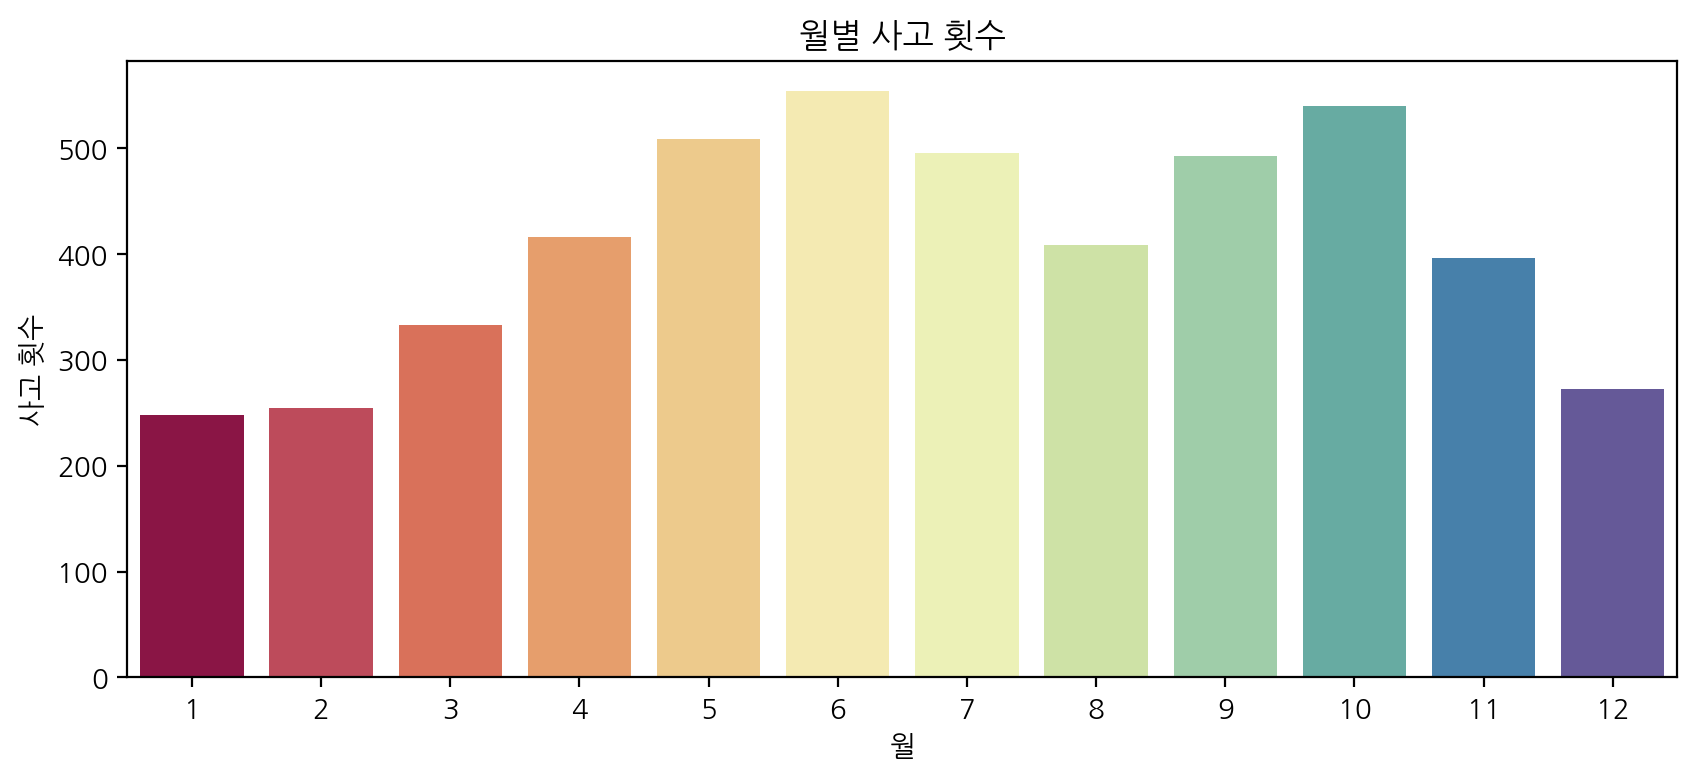

In [76]:
# 월별 자전거 사고 발생 횟수를 시각화
# 어떤 달에 사고가 집중적으로 발생하는지 확인

plt.figure(figsize = (10,4))
sns.countplot(df, x = 'Month', hue = 'Month', palette = 'Spectral', legend = False) # 범례 생략
plt.xlabel("월")
plt.ylabel("사고 횟수")
plt.title("월별 사고 횟수")
plt.show()

# 여름철에 사고가 가장 많이 발생하며, 겨울은 상대적으로 사고 빈도가 낮음
# 자전거 이용이 활발한 계절(날씨가 따뜻한 시기)에 사고 발생 위험도 함께 증가하는 경향 확인 가능

## 출퇴근 시간대 자전거 탑승 많음

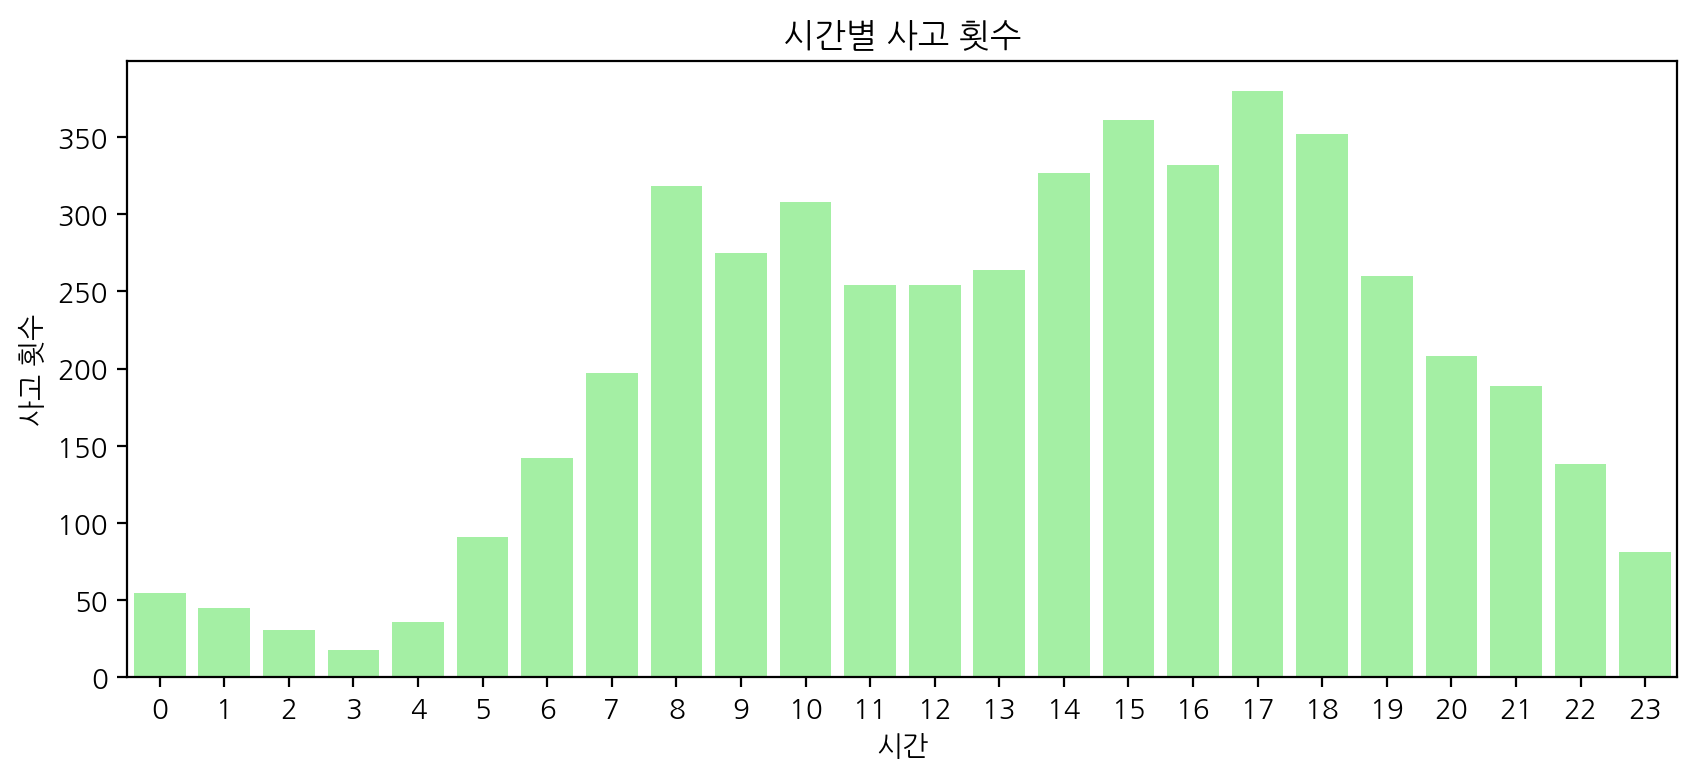

In [77]:
# 시간대별 자전거 사고 발생 횟수를 시각화
# 하루 중 어느 시간대에 사고가 많이 발생하는지 확인

plt.figure(figsize = (10, 4))
sns.countplot(df, x = 'Time', color = 'palegreen')
plt.xlabel("시간")
plt.ylabel("사고 횟수")
plt.title("시간별 사고 횟수")
plt.show()

# 출퇴근 및 통학 시간대, 자전거 통행량이 많은 시간대에 사고 위험도 함께 증가

In [78]:
# 사고 유형별 사망자 수, 부상자 수를 합산 후 인명 피해 규모를 집계
df = df.assign(totalCasualty = df['dead'] + df['hurt'])
groupCasualty = df.groupby('accidentType')[['hurt', 'dead']].sum().reset_index()
groupCasualty

,accidentType,hurt,dead
0,차대사람 - 기타,960,7
1,차대사람 - 길가장자리구역통행중,106,1
2,차대사람 - 보도통행중,551,9
3,차대사람 - 차도통행중,103,3
4,차대사람 - 횡단중,635,5
5,차대차 - 기타,8981,112
6,차대차 - 정면충돌,1019,12
7,차대차 - 추돌,1085,15
8,차대차 - 측면충돌,14408,168
9,차대차 - 후진중충돌,91,1


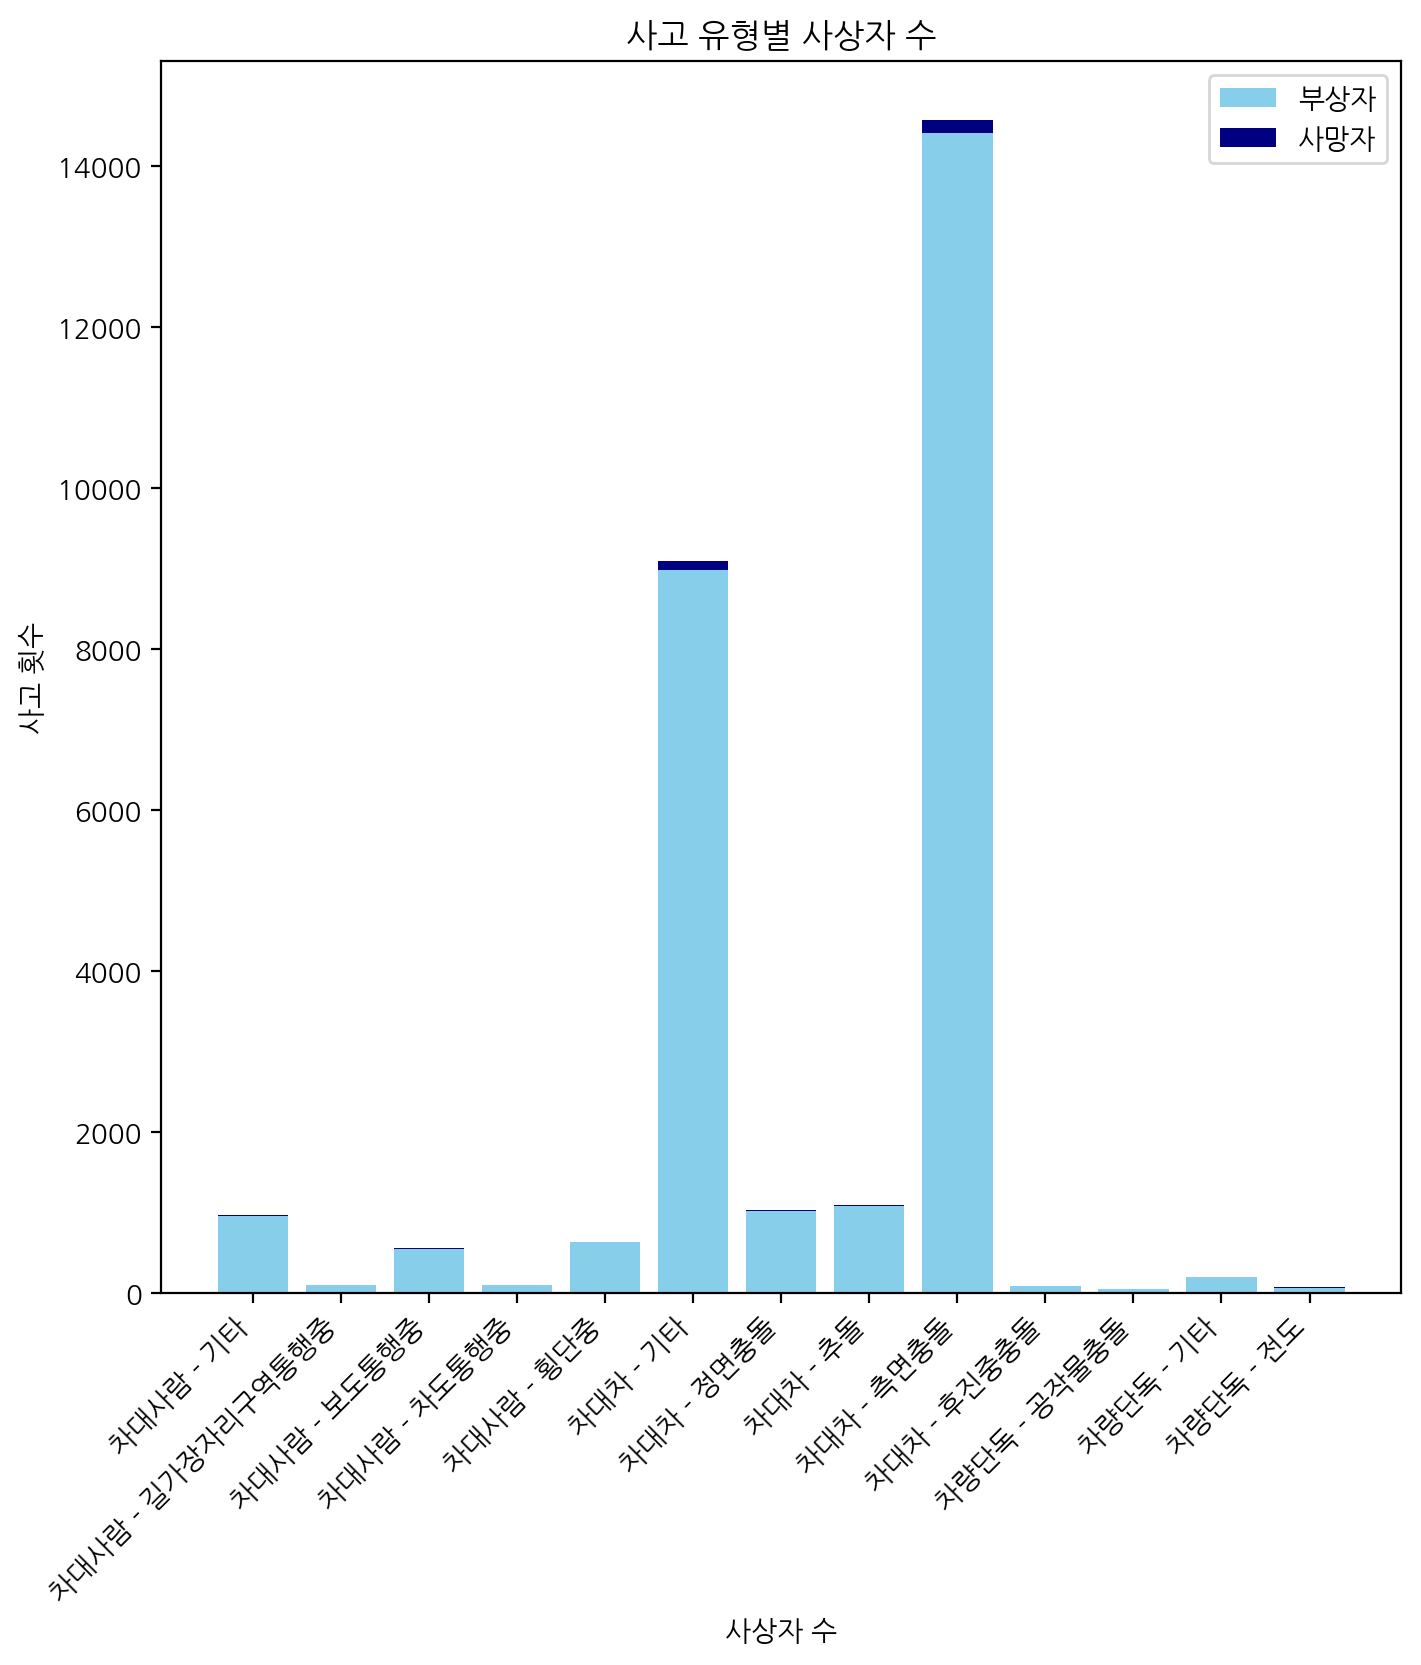

In [79]:
# 사고 유형별 부상자 수와 사망자 수 누적 시각화
# 어떤 사고 유형이 인명 피해(사상자 수)가 가장 큰지 비교 분석

plt.figure(figsize = (8,8))
plt.bar(groupCasualty['accidentType'], groupCasualty['hurt'], color = 'skyblue', label = '부상자')
plt.bar(groupCasualty['accidentType'], groupCasualty['dead'], bottom=groupCasualty['hurt'], color = 'navy', label = '사망자')
# sns.barplot(data = accident_total, x = 'accidentType', y = 'total', hue='')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()
plt.xlabel("사상자 수")
plt.ylabel("사고 횟수")
plt.title("사고 유형별 사상자 수")
plt.show()

# 차대차 사고가 사상사 수 많음

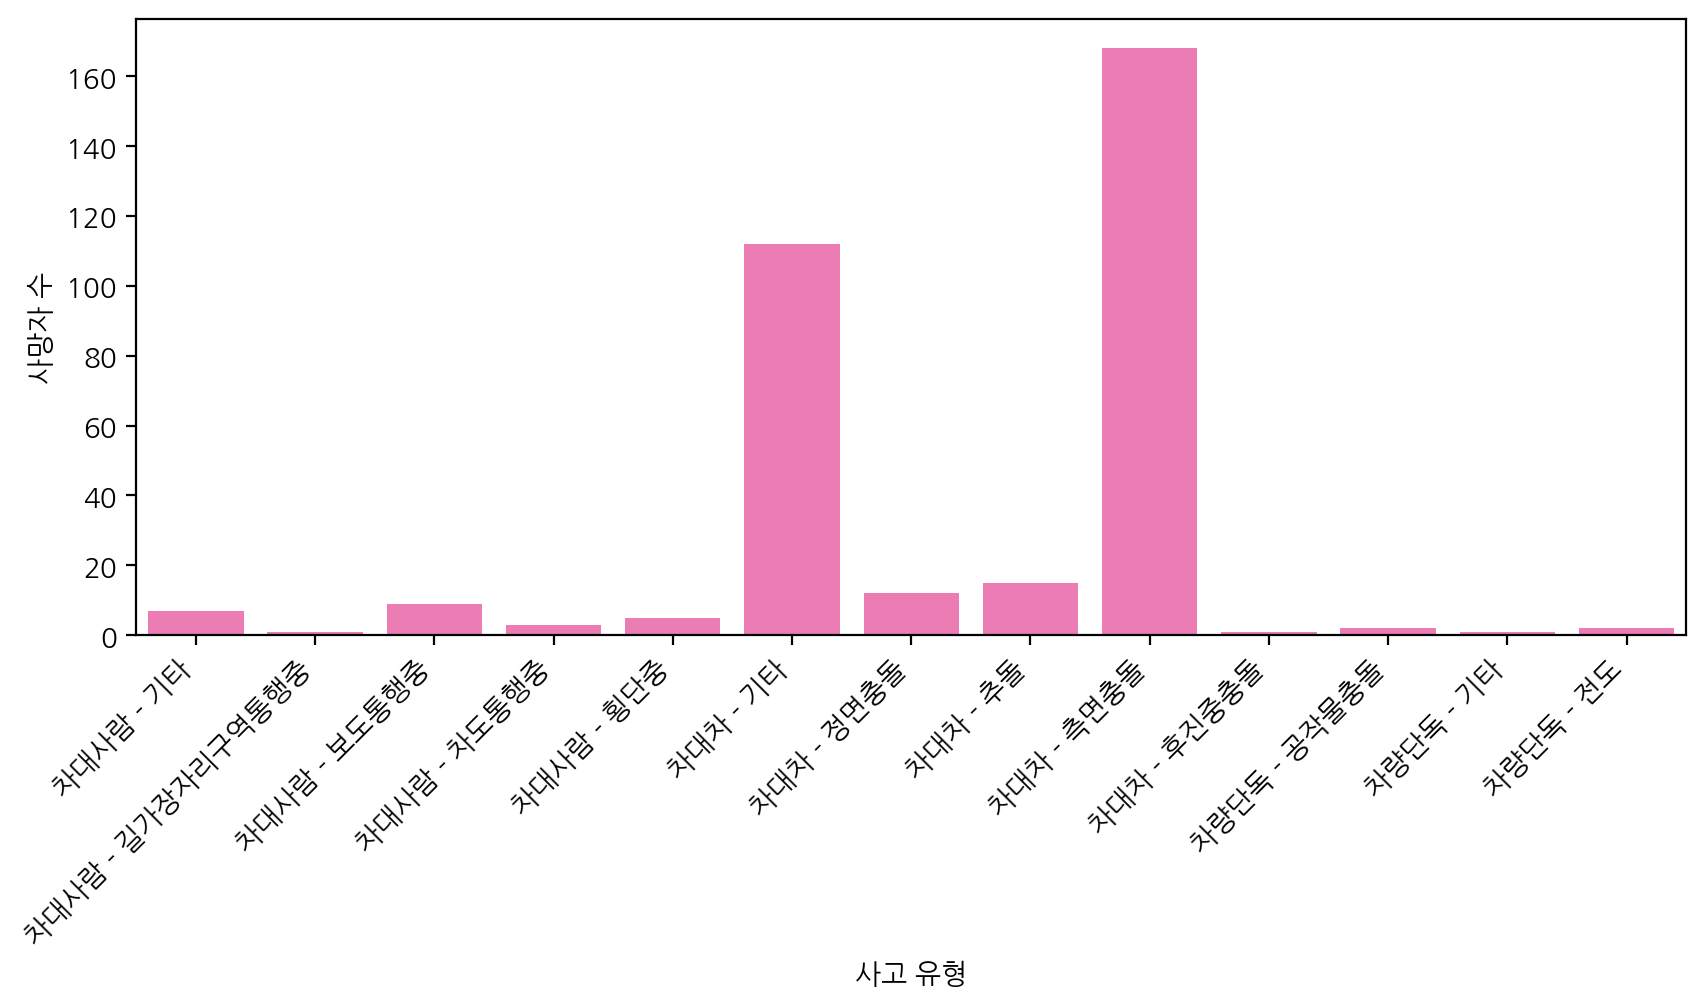

In [80]:
# 사고 유형별 사망자 수를 막대그래프로 시각화
# 어떤 사고 유형에서 사망자가 많이 발생했는지 확인

plt.figure(figsize = (10, 4))
sns.barplot(data=groupCasualty, x = 'accidentType', y = 'dead', color = 'hotpink')  # cmap 오류나서 제거
plt.xticks(rotation=45, ha = 'right')
plt.xlabel("사고 유형")
plt.ylabel("사망자 수")
plt.show()

# 차대차 측면충돌 사망자 수가 두드러지게 많음
# 단순 사고 빈도보다 사고의 치명도를 보여 줌

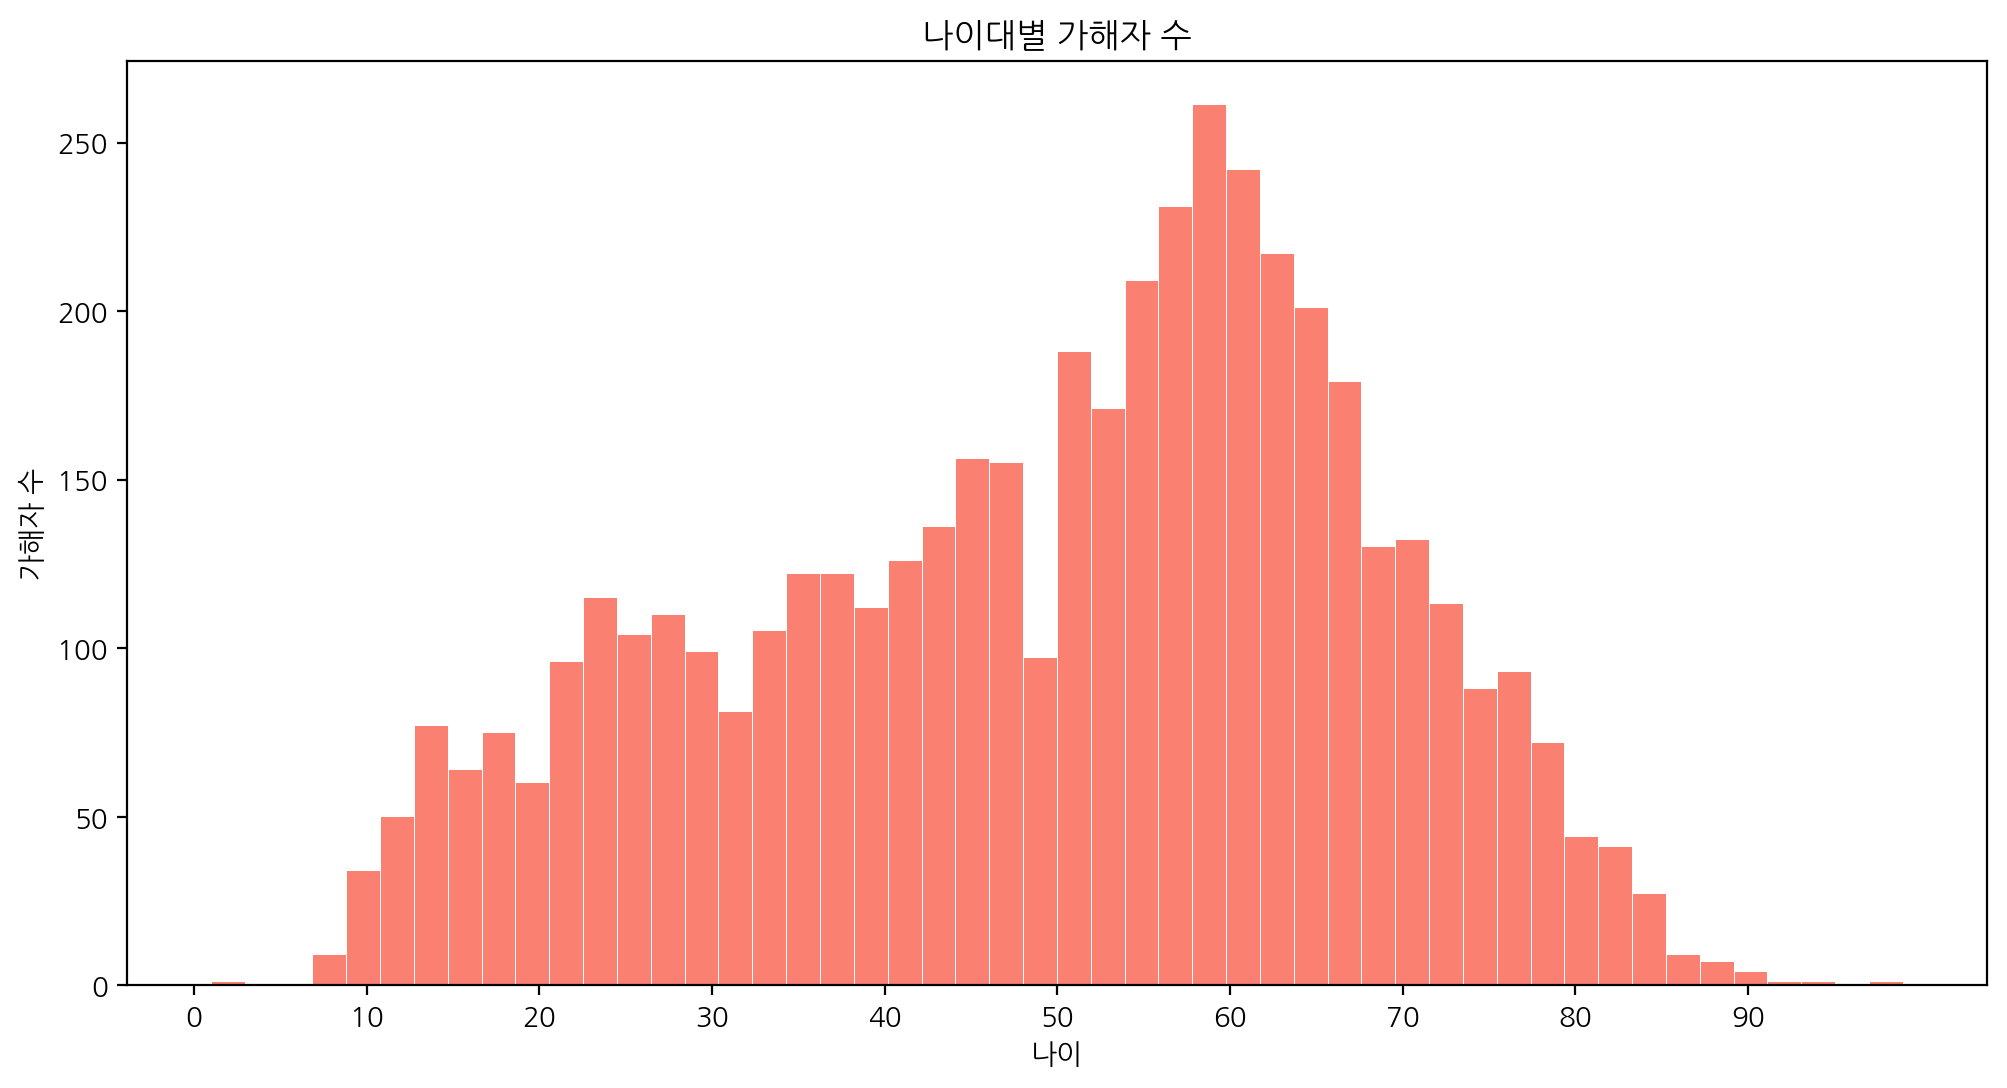

In [81]:
# 가해자 나이대별 사고 발생 분포 시각화
# 어떤 나이대에서 자전거 사고를 많이 일으키는지 분석

plt.figure(figsize = (12, 6))

# bins=50은 나이 구간을 50개로 나눔
# rwidth=0.97은 막대 사이의 간격을 조금 줄임
plt.hist(df['prepAge'], bins = 50, rwidth = .97, color = 'salmon')

plt.xlabel("나이")
plt.ylabel("가해자 수")
plt.xticks(np.arange(0,100,10))
plt.title("나이대별 가해자 수")

plt.show()

# 이 데이터에서 가해자가 가장 많은 연령대는 60대 전후이나, 전체 자전거 이용자 대비하여 비율은 알아 볼 필요가 있음. - 예성
# 가해자는 주로 50대 초반에서 60대 초반 사이에 집중
# 높은 연령층이 자전거 사고 발생률도 높음

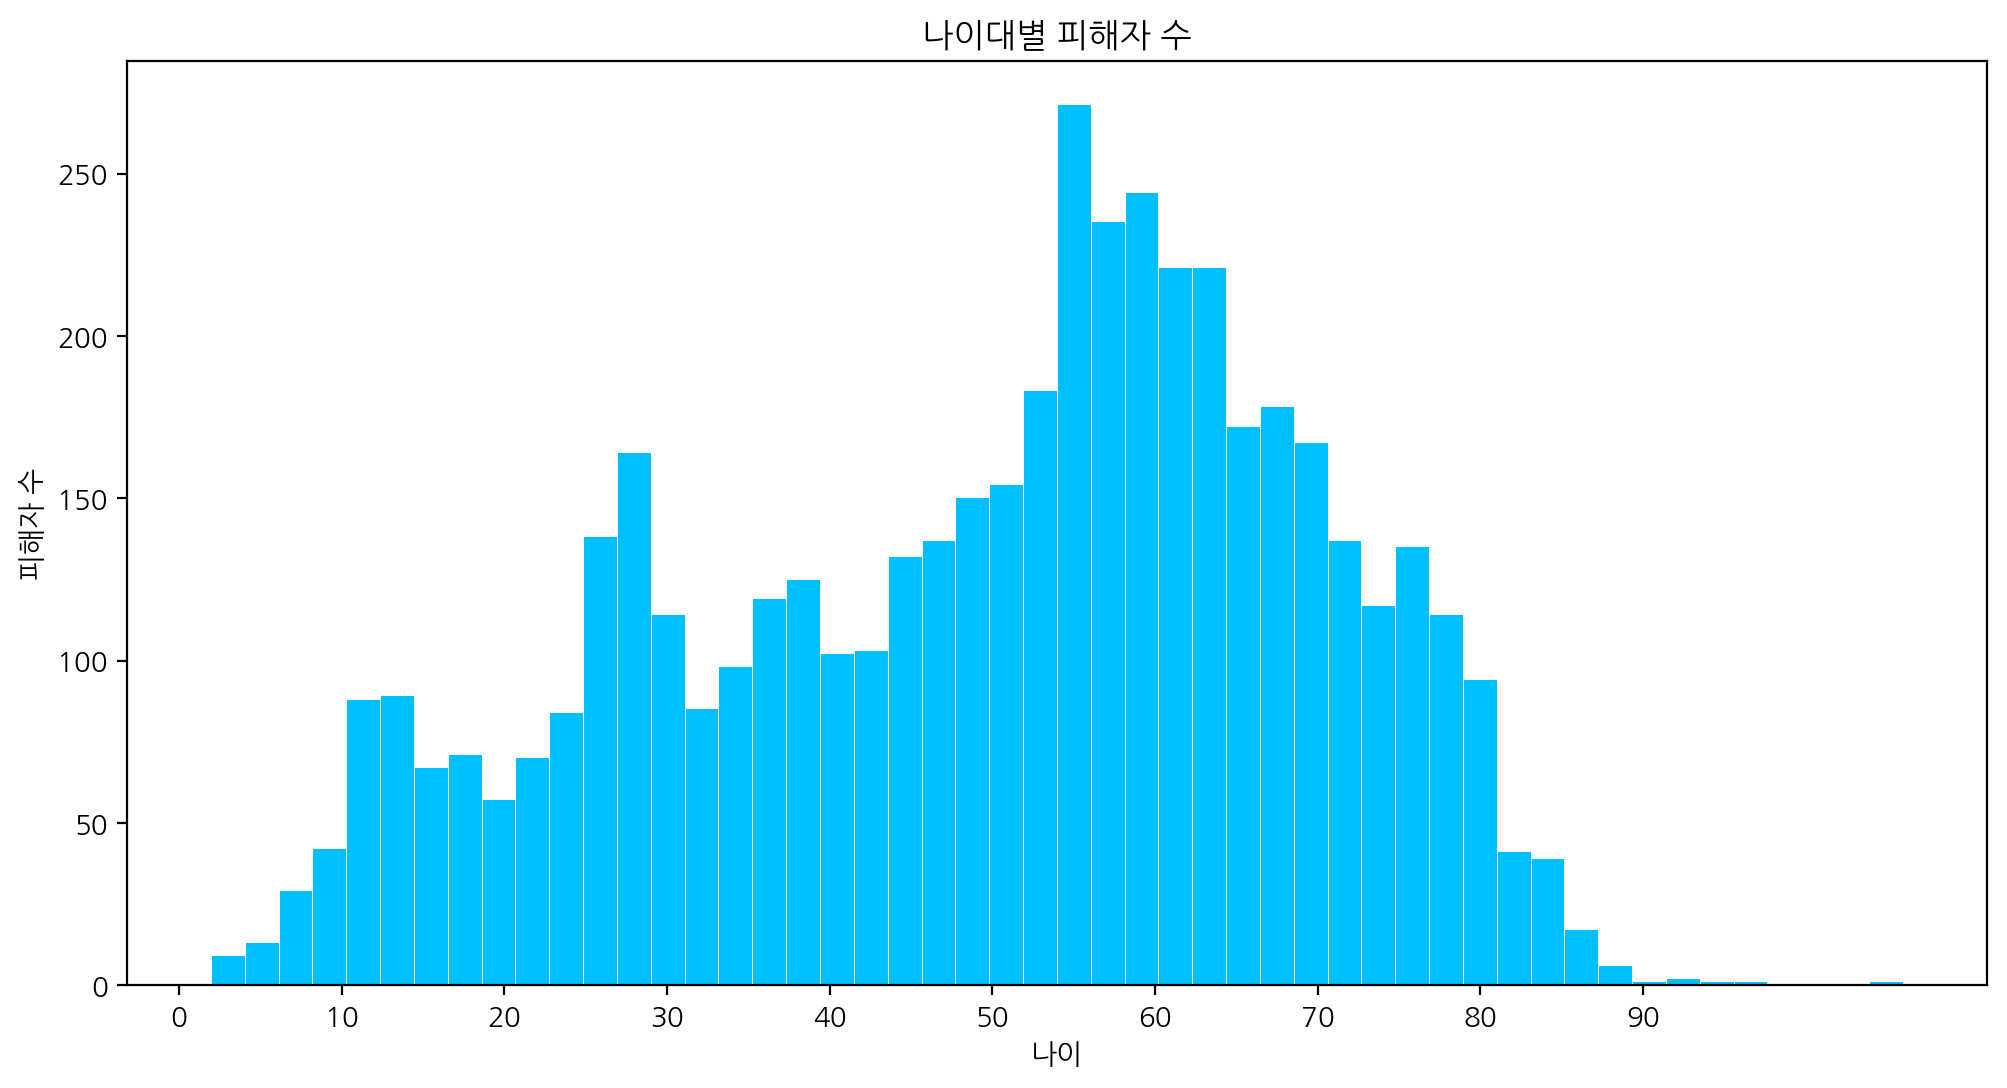

In [82]:
# 피해자 나이대별 사고 발생 분포 시각화
# 어떤 나이대의 사람들이 자전거 사고의 피해자가 되는지 분석

plt.figure(figsize = (12, 6))

# bins=50: 나이를 세밀하게 구간화하여 분포 확인
# rwidth=0.97: 막대 간격을 좁혀서 시각적으로 보기 쉽게 설정
plt.hist(df['victemAge'], bins = 50, rwidth = .97, color = 'deepskyblue')

plt.xlabel("나이")
plt.ylabel("피해자 수")
plt.xticks(np.arange(0,100,10))
plt.title("나이대별 피해자 수")

plt.show()

# 피해자는 주로 50대 중반에서 60대 중반 사이에 집중
# 높은 연령층이 자전거 사고 피해수도 많음
# - 위와 동일

In [83]:
# '기타불명' 값은 None으로 처리하여 시각화에서 제외
df['prepGender'] = df['prepGender'].replace('기타불명', None)
df['victemGender'] = df['victemGender'].replace('기타불명', None)

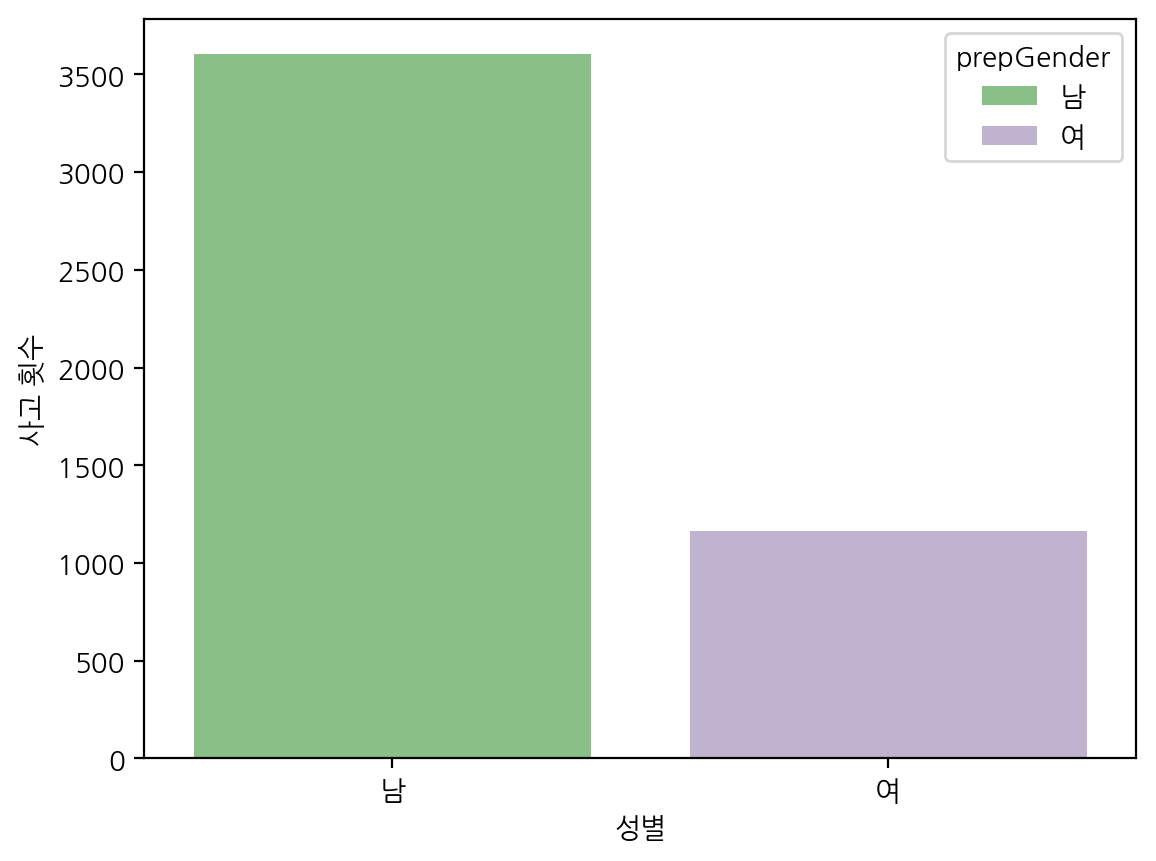

In [84]:
# 가해자 성별별 사고 횟수 시각화
# 성별에 따라 사고 발생 빈도가 어떻게 다른지 분석

sns.countplot(data = df, x = 'prepGender', hue = 'prepGender', palette = 'Accent')
plt.xlabel("성별")
plt.ylabel("사고 횟수")
plt.show()

# 남성 가해자의 사고 비율이 여성보다 높음
# 남/여의 자전거 이용인원 대비 사고 비율이 아니라, 단순 해당 데이터의 발생 횟수임.
# 정확한 비율을 알려면 자전거 사고(남)/이용자(남), 사고(여)/이용자(여)가 되어야 함

## 맑은 날에 자전거 사고가 가장 많이 발생하며 피해 규모도 큼

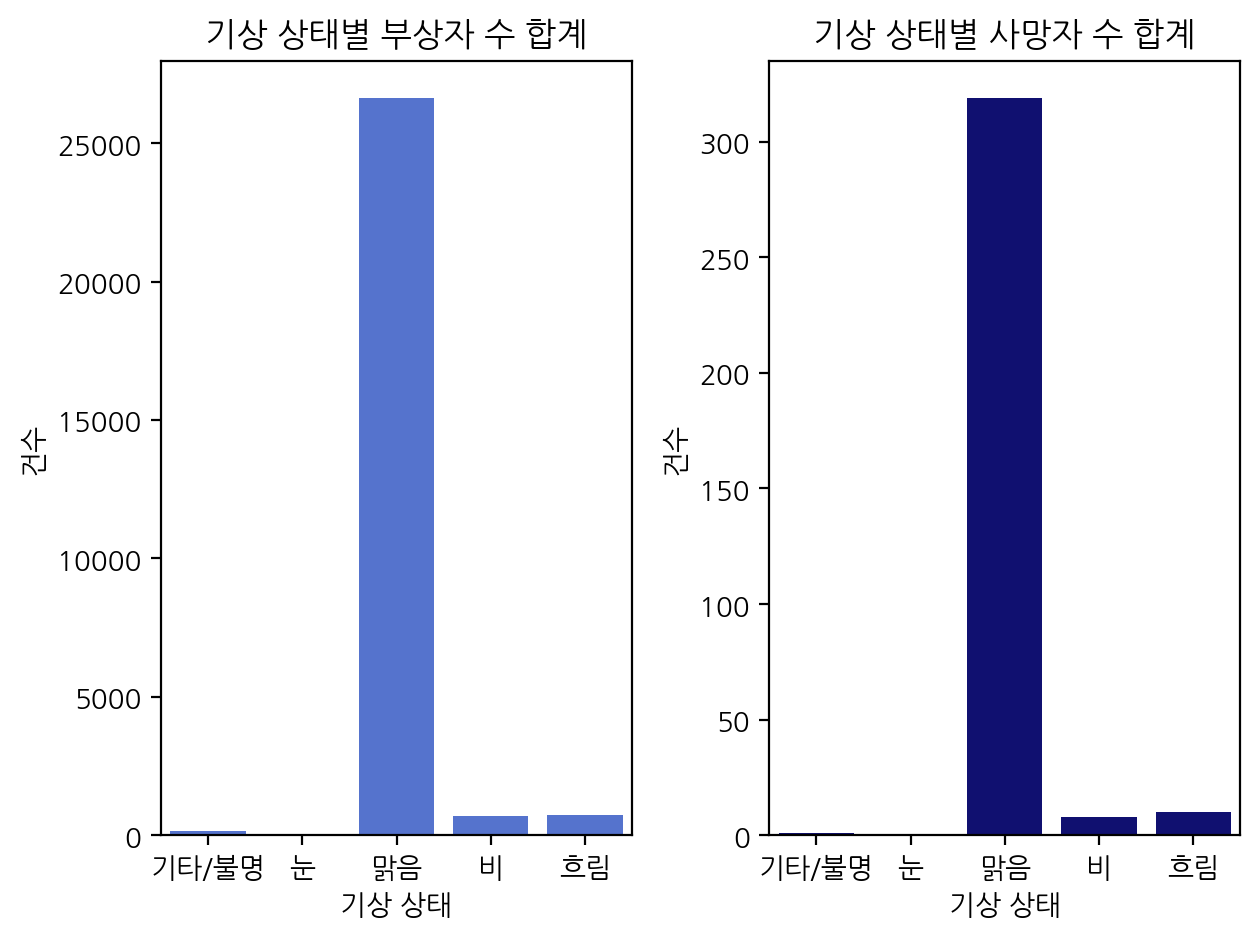

In [85]:
# 기상 상태에 따른 자전거 사고의 피해 정도 분석
# 날씨가 사고의 심각도에 어떤 영향을 미치는지 보기 위해 '부상자 수'와 '사망자 수'를 각각 집계

# 'weather' 기준으로 그룹화하여 사망자(death), 부상자(hurt)의 합계와 평균을 계산
agg_df = df.groupby("weather")[["dead", "hurt"]].agg(["sum", "mean"])
agg_df.columns = [f"{col[0]}_{col[1]}" for col in agg_df.columns]

# 그래프: 1행 2열의 서브플롯으로 부상자와 사망자 수 각각 시각화

# 1. 기상 상태별 부상자 수 합계
plt.subplot(1,2,1)
sns.barplot(data = agg_df, x = "weather", y = "hurt_sum", color = 'royalblue')
plt.title("기상 상태별 부상자 수 합계")
plt.xlabel("기상 상태")
plt.xticks(rotation = 0)
plt.ylabel("건수")
plt.tight_layout()

# 2. 기상 상태별 사망자 수 합계
plt.subplot(1,2,2)
sns.barplot(data = agg_df, x = "weather", y = "dead_sum", color = 'navy')
plt.title("기상 상태별 사망자 수 합계")
plt.xlabel("기상 상태")
plt.xticks(rotation = 0)
plt.ylabel("건수")
plt.tight_layout() #없으면 겹침

plt.show()

# 맑은 날에 사고가 가장 많이 발생하고, 부상자 수와 사망자 수 모두 가장 많음
# 맑은 날 자전거 이용률이 높기은 것으로 추정
# 맑은 날이 아는 날은 자전거 이용 자체가 줄어들기 때문에 상대적으로 사고 발생도 적음
# 맑은날에 자전거 이용이 많기에 그에 따라 맑은 날에 자전거를 이용하다 부상 당하는 사람도 많습니다.

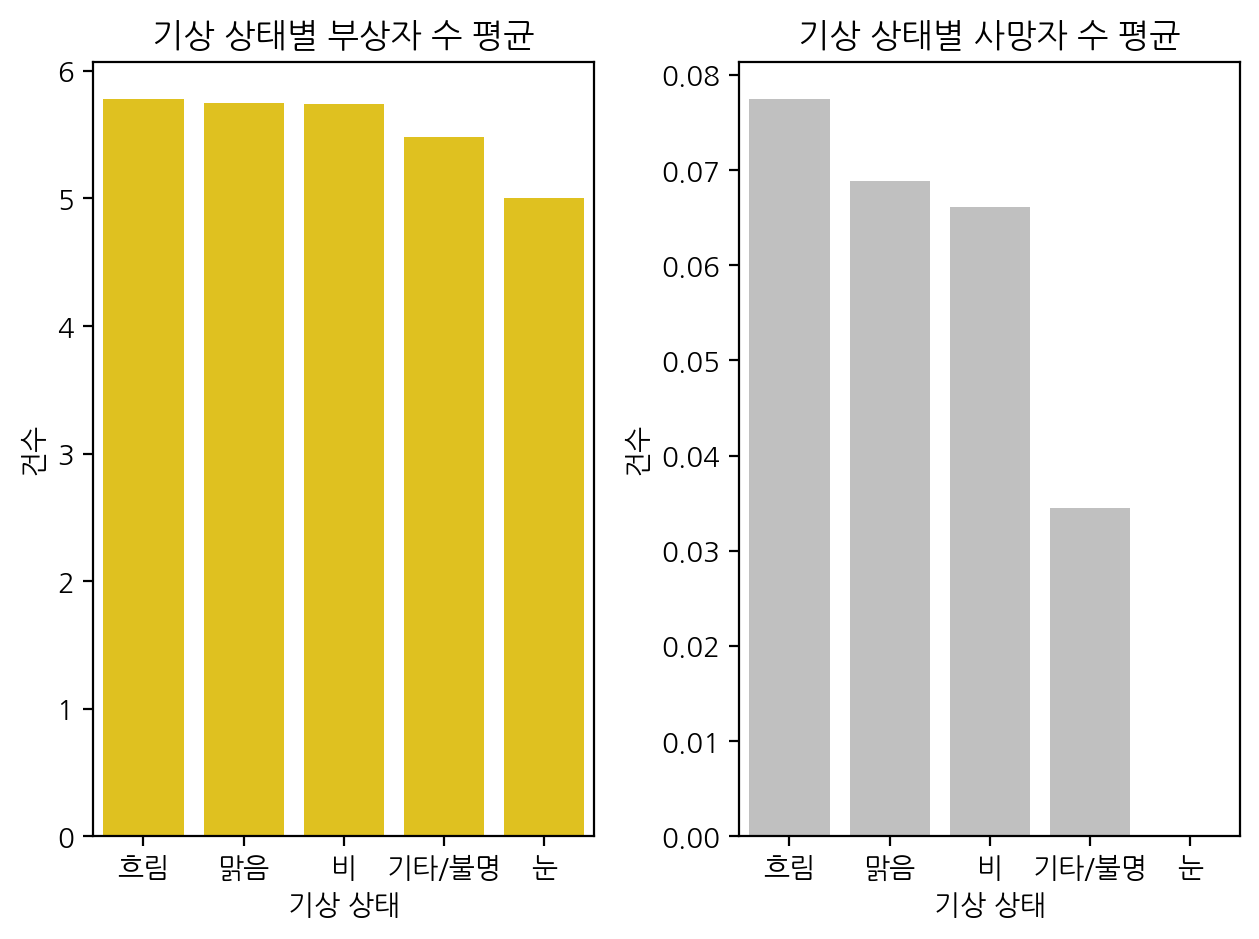

In [86]:
# 기상 상태에 따른 평균 피해 규모 분석
# 날씨에 따라 사고 1건당 평균적으로 얼마나 많은 피해(부상/사망)가 발생했는지 비교

order_hurt = agg_df.sort_values(by="hurt_mean", ascending=False).reset_index()['weather']

plt.subplot(1,2,1)
sns.barplot(data = agg_df, x = "weather", y = "hurt_mean", color = 'gold', order = order_hurt) # 평균 부상자 수
plt.title("기상 상태별 부상자 수 평균")
plt.xlabel("기상 상태")
plt.xticks(rotation = 0)
plt.ylabel("건수")

order_dead = agg_df.sort_values(by="dead_mean", ascending=False).reset_index()['weather']

plt.subplot(1,2,2)
sns.barplot(data = agg_df, x = "weather", y = "dead_mean", color = 'silver', order = order_dead) # 평균 사망자 수
plt.title("기상 상태별 사망자 수 평균")
plt.xlabel("기상 상태")
plt.xticks(rotation = 0)
plt.ylabel("건수")
plt.tight_layout()

plt.show()

# 맑은 날에 평균 피해 수치는 낮지만, 전체 사고가 많아 피해 총합은 큼
# 비나 눈이 오는 날 사고 1건당 평균 피해(부상/사망) 수치가 더 높은 경향 → 기상 악화 시 사고가 더 치명적일 수 있음

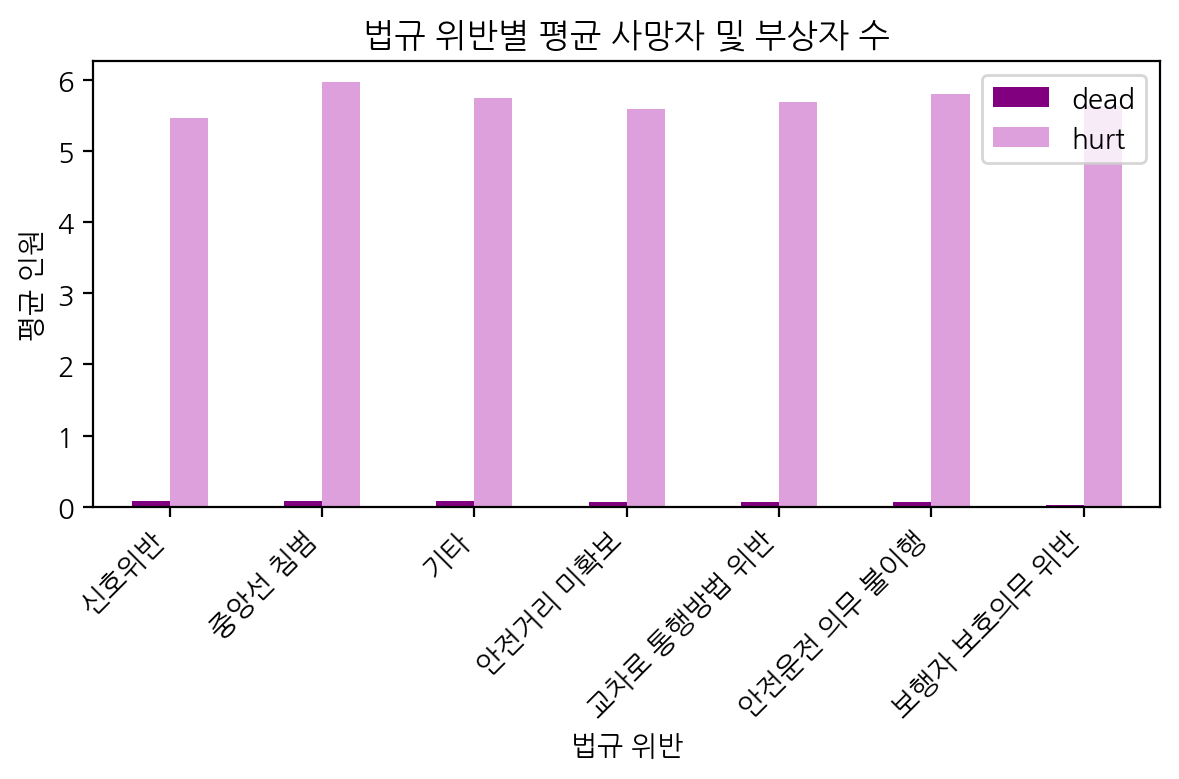

In [87]:
# 법규 위반 항목별로 사고의 평균 피해 규모 분석 (사망자 및 부상자)

# 각 위반 유형별 사망자/부상자의 평균값을 구하고 사망자 기준 내림차순 정렬
agg = df.groupby("violation")[["dead", "hurt"]].mean().sort_values("dead", ascending = False)

agg.plot(kind = "bar", figsize = (6, 4), color = ["purple", "plum"])
plt.title("법규 위반별 평균 사망자 및 부상자 수")
plt.xlabel("법규 위반")
plt.ylabel("평균 인원")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.show()

## 중앙선 침범이 평균적으로 피해가 가장 큼

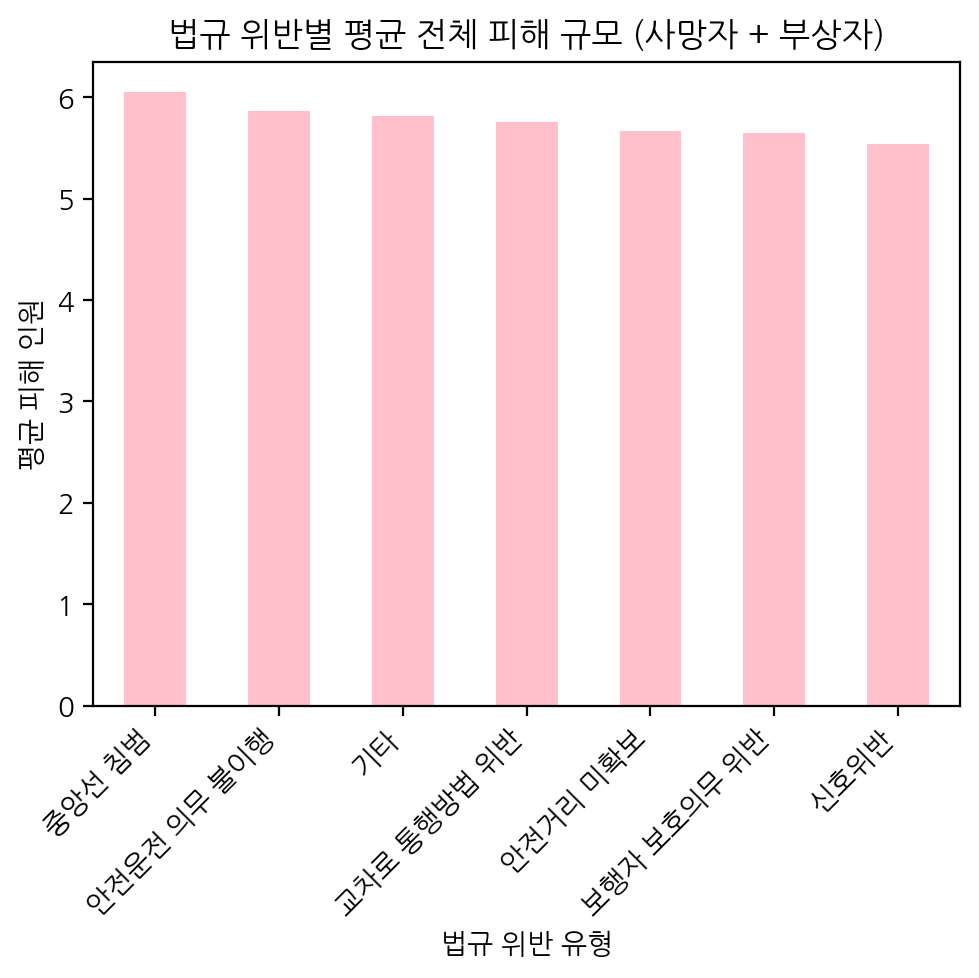

In [88]:
# 사망자와 부상자를 더한 전체 피해 규모 기준으로 위반 유형을 비교

# 평균 사망자 + 평균 부상자 계산 → 총 평균 피해 인원 계산
mean_df = df.groupby("violation")[["dead", "hurt"]].mean()
mean_df["total_victims"] = mean_df["dead"] + mean_df["hurt"]

# 총 평균 피해 인원 기준으로 정렬
mean_df = mean_df.sort_values("total_victims", ascending=False)

mean_df["total_victims"].plot(kind = "bar", figsize = (5, 5), color = 'pink')
plt.title("법규 위반별 평균 전체 피해 규모 (사망자 + 부상자)")
plt.xlabel("법규 위반 유형")
plt.ylabel("평균 피해 인원")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.show()

In [89]:
# 나이대 구간 설정
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 120]
labels = ['10대 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상']

df['prepAgeGroup'] = pd.cut(df['prepAge'], bins = bins, labels = labels)
df['victemAgeGroup'] = pd.cut(df['victemAge'], bins = bins, labels = labels)

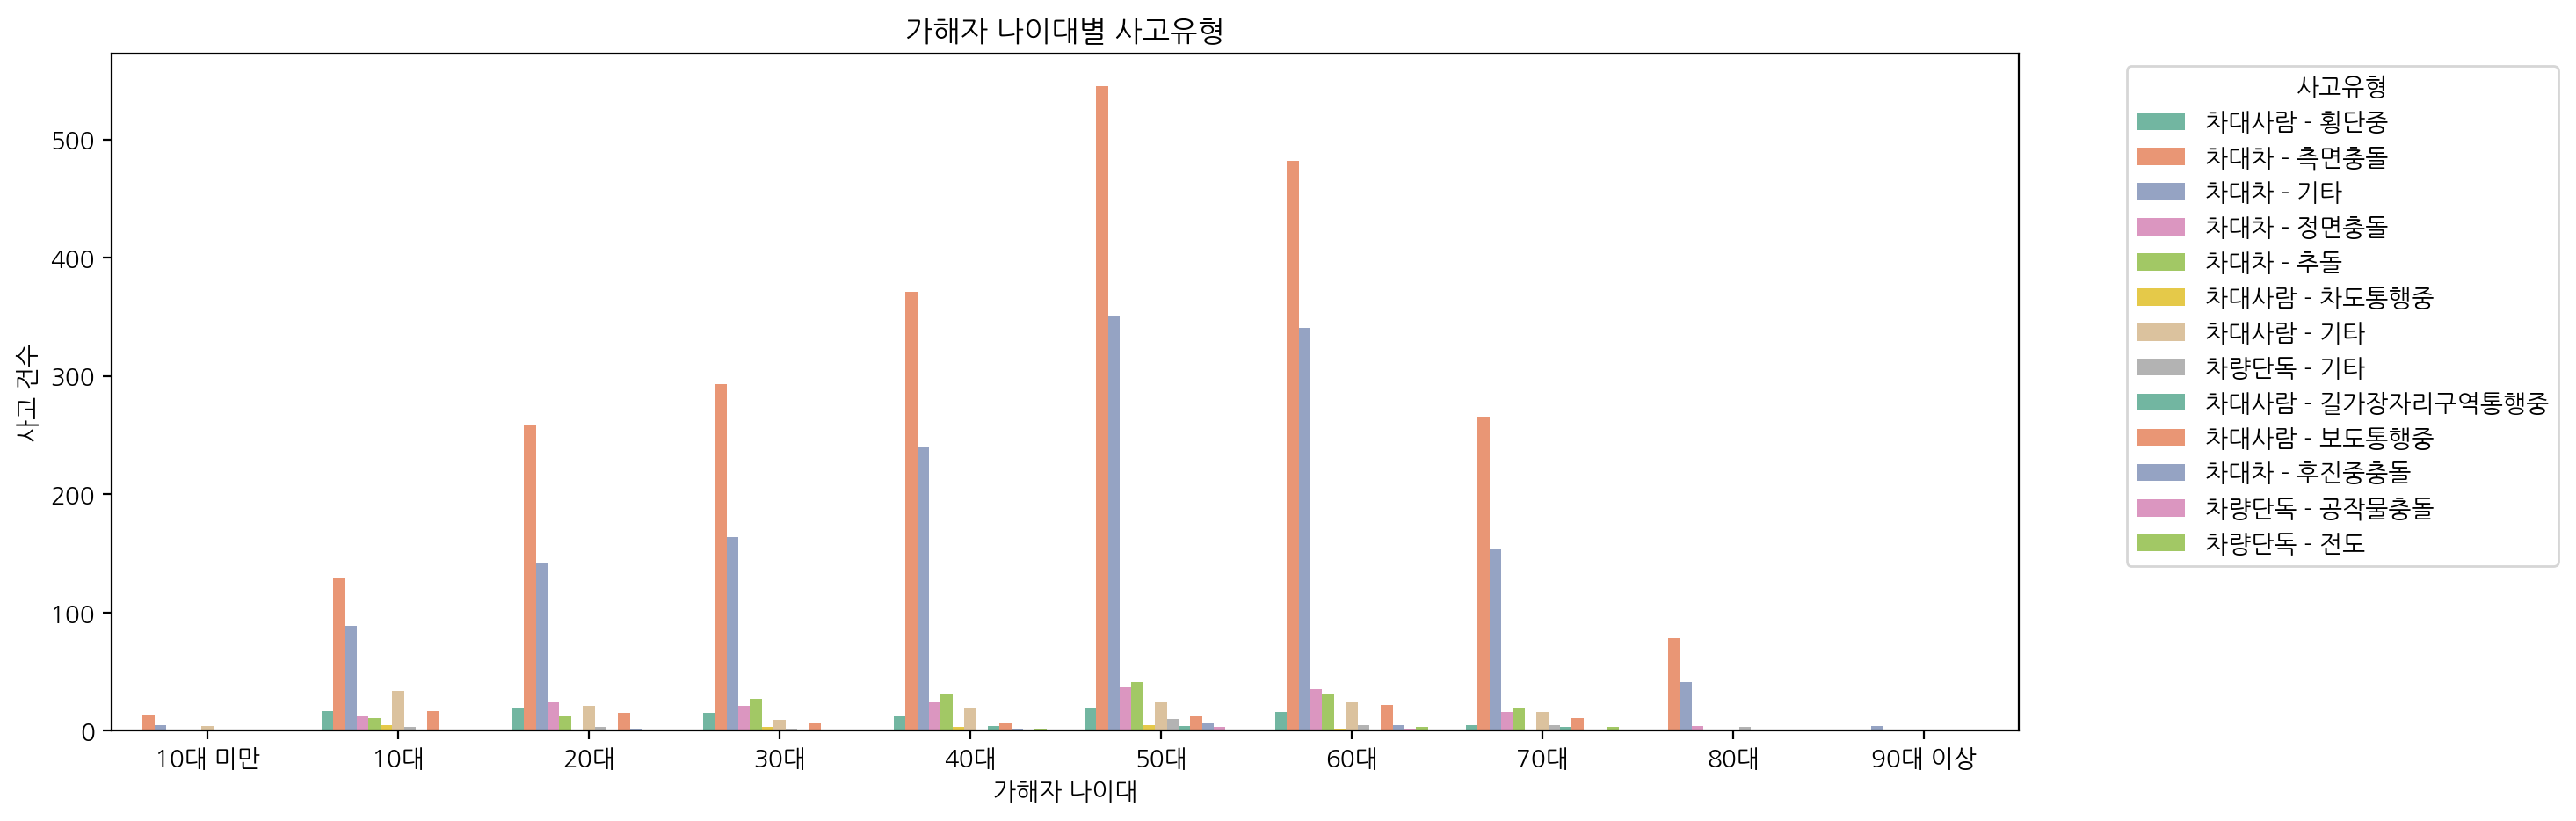

In [90]:
# 나이대별 사고유형 시각화(가해자 기준)
plt.figure(figsize = (14, 5))
sns.countplot(data = df, x = 'prepAgeGroup', hue = 'accidentType', palette = 'Set2')
plt.title("가해자 나이대별 사고유형")
plt.xlabel("가해자 나이대")
plt.ylabel("사고 건수")
plt.legend(title = "사고유형", bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.show()

# 40~60대 가해자가 가장 많은 사고를 일으키며, 대부분 차대차 사고가 중심

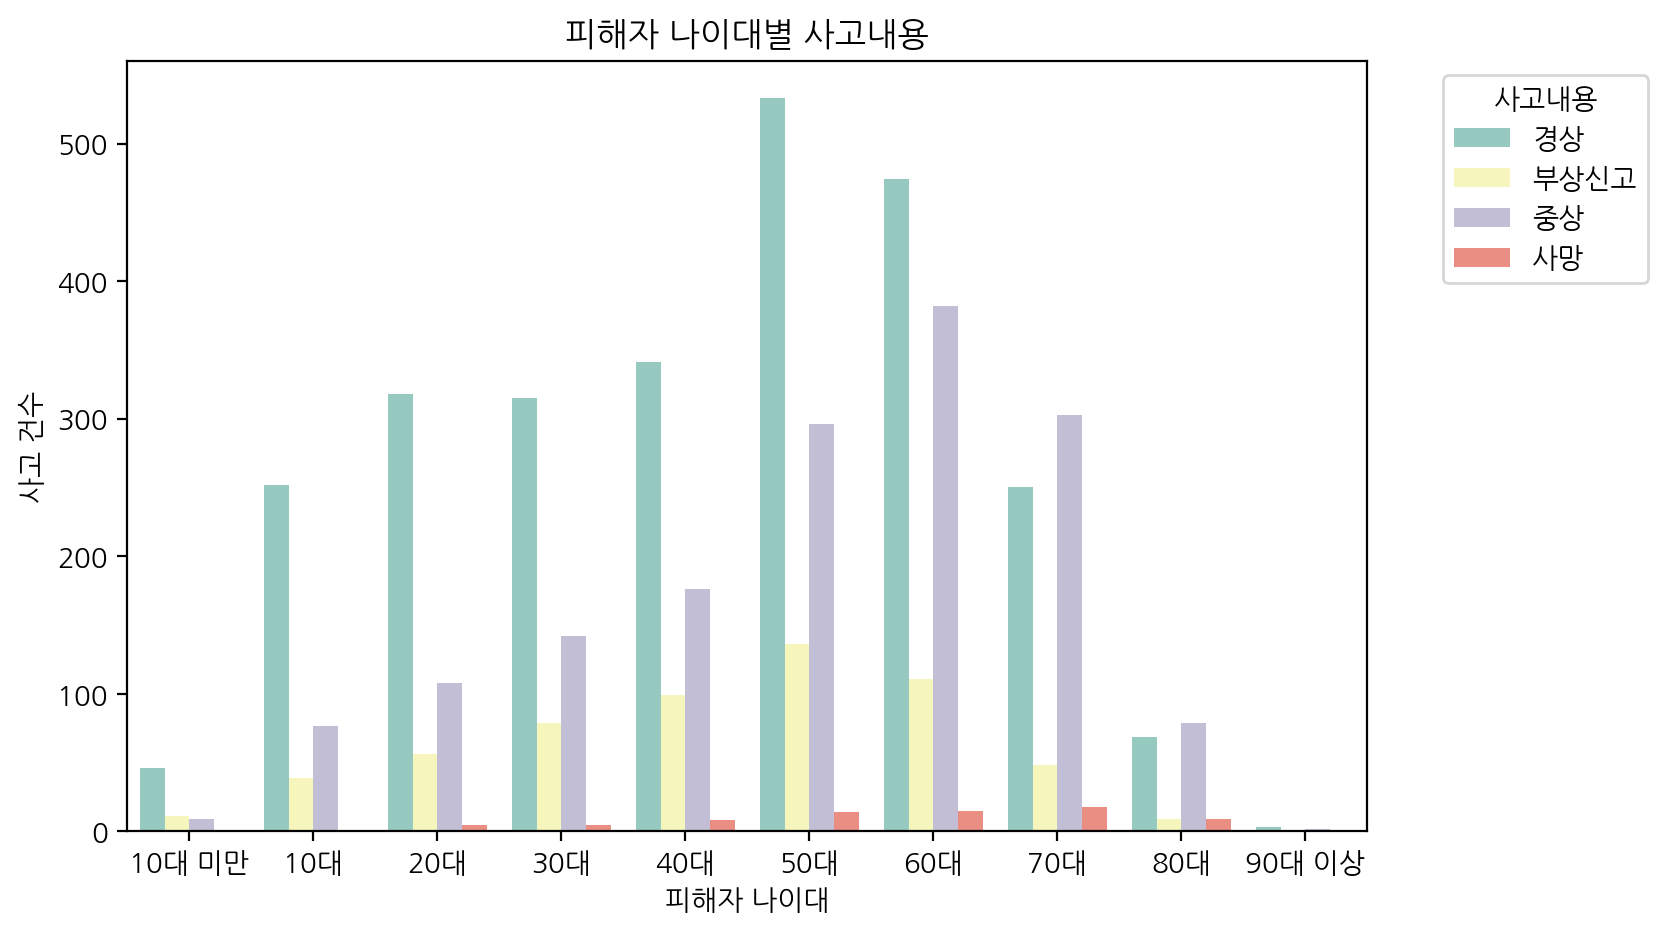

In [91]:
# 나이대별 사고내용(사고 상황의 상세 분류) 시각화(피해자 기준)
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'victemAgeGroup', hue = 'accidentDetail', palette = 'Set3')
plt.title("피해자 나이대별 사고내용")
plt.xlabel("피해자 나이대")
plt.ylabel("사고 건수")
plt.legend(title = "사고내용", bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.show()

# 50대에서 60대에 경상 많이 발생
# 연령대가 높아질 수록 중상, 사망 많이 발생

In [92]:
# 가해자 나이대별 사고내용 빈도수
result = df.groupby('prepAgeGroup', observed = False, as_index = False)['accidentDetail'].value_counts().pivot(index = 'prepAgeGroup',
                                                                                                           columns = 'accidentDetail',
                                                                                                           values = 'count') #observed False 명시적 표현은 FutureWarning 제거 위함
result

accidentDetail,경상,부상신고,사망,중상
prepAgeGroup,,,,
10대 미만,14,9,0,2
10대,174,70,2,75
20대,271,65,6,157
30대,297,44,6,196
40대,382,81,8,247
50대,579,104,17,360
60대,532,111,13,313
70대,238,77,12,171
80대,58,15,11,44


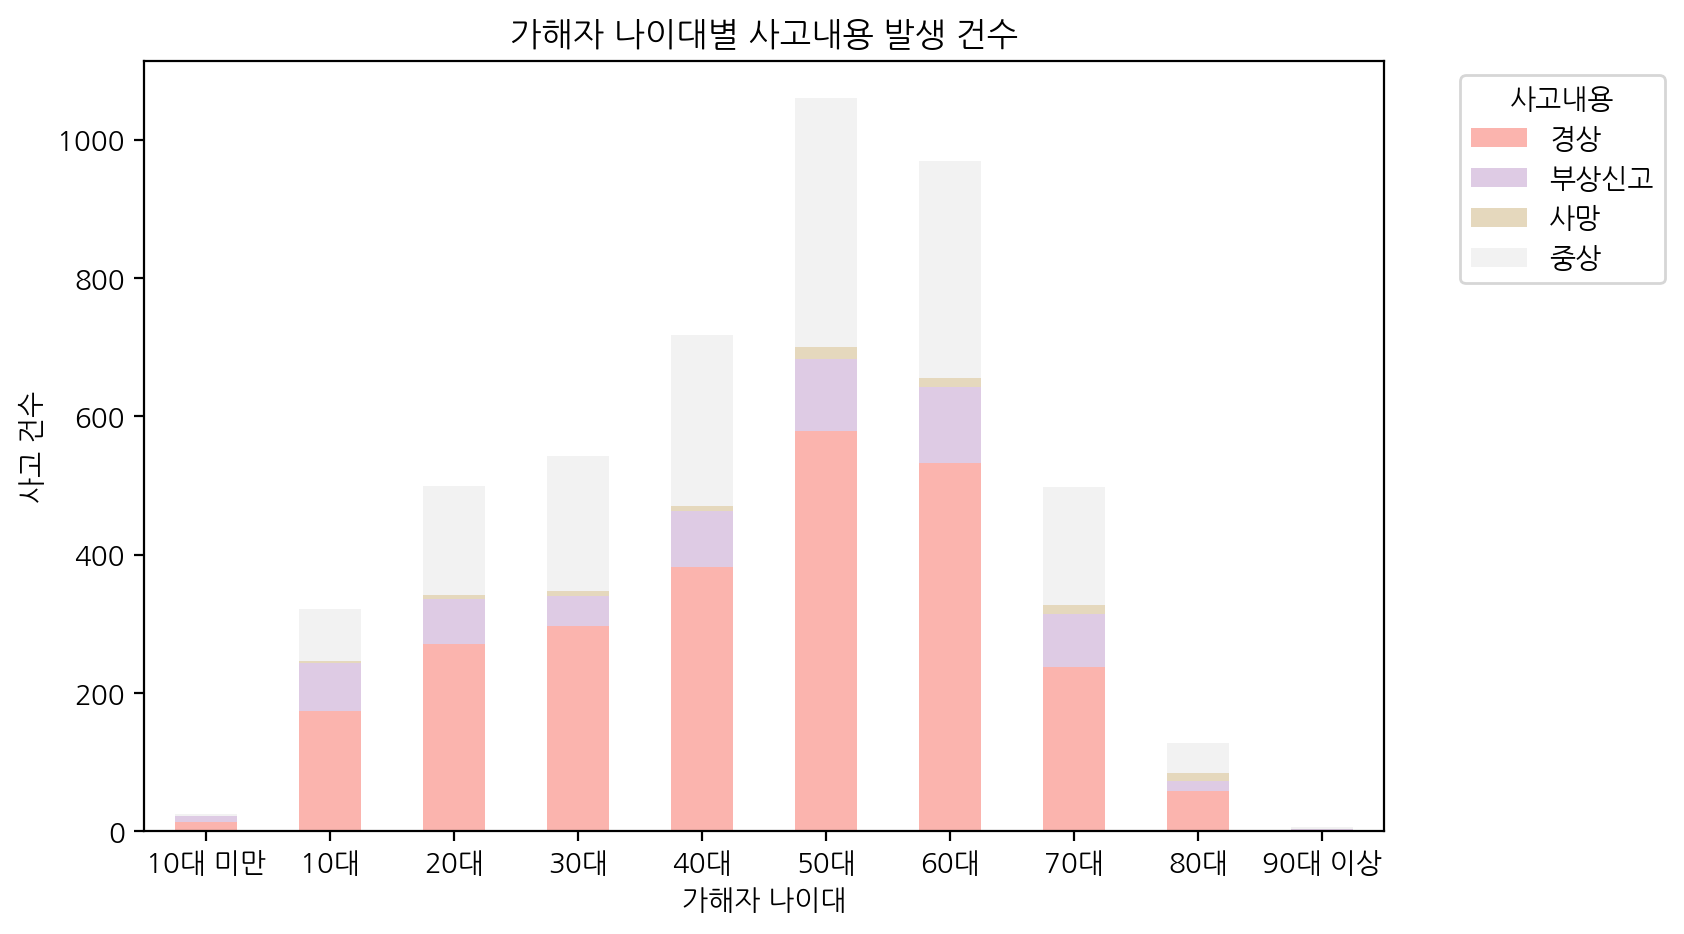

In [93]:
# 가해자 나이대별 사고내용 빈도수 시각화
# 가해자 나이대별로 어떤 사고내용이 많이 발생했는지 확인

result.plot(kind = 'bar', stacked = True, figsize = (8, 5), colormap = 'Pastel1')
plt.title("가해자 나이대별 사고내용 발생 건수")
plt.xlabel("가해자 나이대")
plt.ylabel("사고 건수")
plt.legend(title = '사고내용', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)

plt.show()

# 50대~60대 가해자의 사고 건수가 가장 많으며, 경상과 중상 비율이 높음
# 상대적으로 10대 이하, 80대 이상은 사고 건수 자체가 낮게 나타남

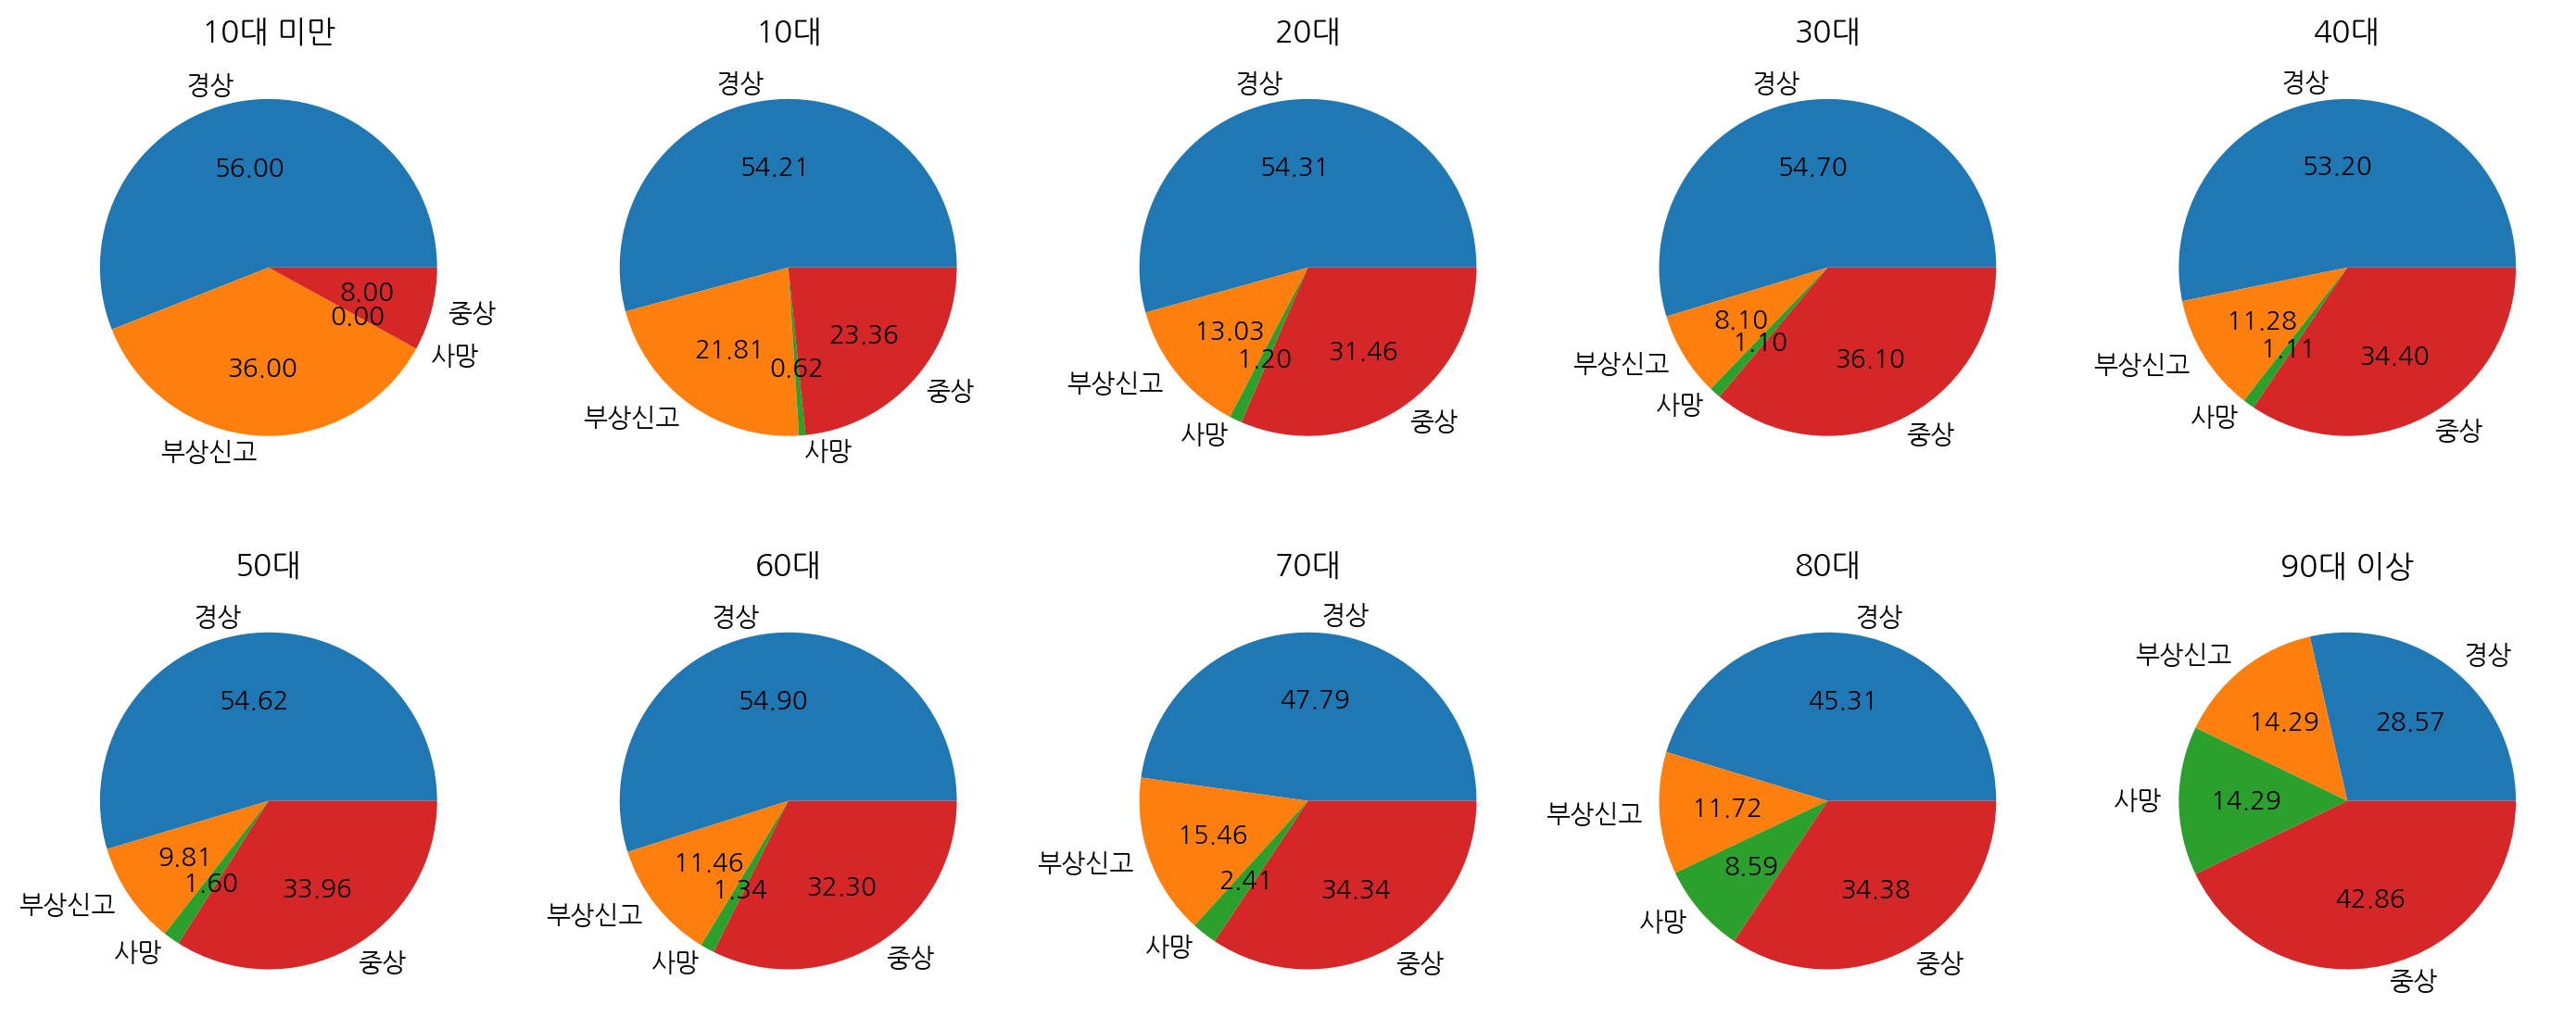

In [94]:
# labels = ['경상','부상신고','사망','중상']


plt.figure(figsize=(14,7))
for i in range(len(result)):
  plt.subplot(2,5,i+1)
  plt.pie(result.iloc[i],labels = result.iloc[i].index, autopct = '%.2f')
  plt.title(result.index[i])
  plt.tight_layout()
plt.show()
# result.iloc[0].index

In [95]:
# 나이대별 사고내용 유형 비율

pd.options.display.float_format = '{: .2f}'.format # 소수점 둘째 자리까지만 출력

result = df.groupby('prepAgeGroup', observed = False, as_index = False)['accidentDetail'].value_counts(normalize = True).pivot(index = 'prepAgeGroup',
                                                                                                           columns = 'accidentDetail',
                                                                                                           values = 'proportion') #observed False 명시적 표현은 FutureWarning 제거 위함

result

accidentDetail,경상,부상신고,사망,중상
prepAgeGroup,,,,
10대 미만,0.56,0.36,0.00,0.08
10대,0.54,0.22,0.01,0.23
20대,0.54,0.13,0.01,0.31
30대,0.55,0.08,0.01,0.36
40대,0.53,0.11,0.01,0.34
50대,0.55,0.10,0.02,0.34
60대,0.55,0.11,0.01,0.32
70대,0.48,0.15,0.02,0.34
80대,0.45,0.12,0.09,0.34


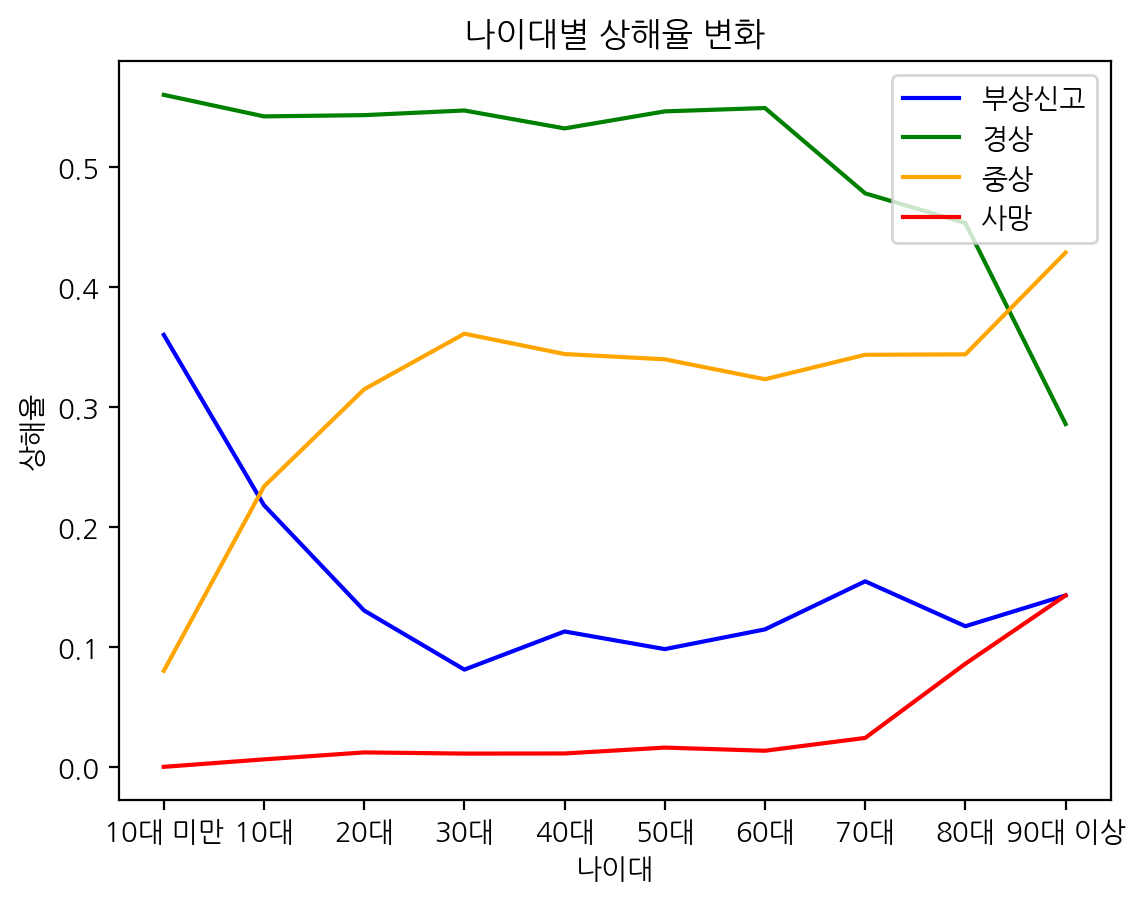

In [96]:
sns.lineplot(result, x='prepAgeGroup', y='부상신고', label = '부상신고', c ='blue')
sns.lineplot(result, x='prepAgeGroup', y='경상',label = '경상', c = 'green')
sns.lineplot(result, x='prepAgeGroup', y='중상', label = '중상', c = 'orange')
sns.lineplot(result, x='prepAgeGroup', y='사망', label = '사망', c = 'r')
plt.ylabel("상해율")
plt.xlabel("나이대")
plt.title("나이대별 상해율 변화")
plt.legend()
plt.show()

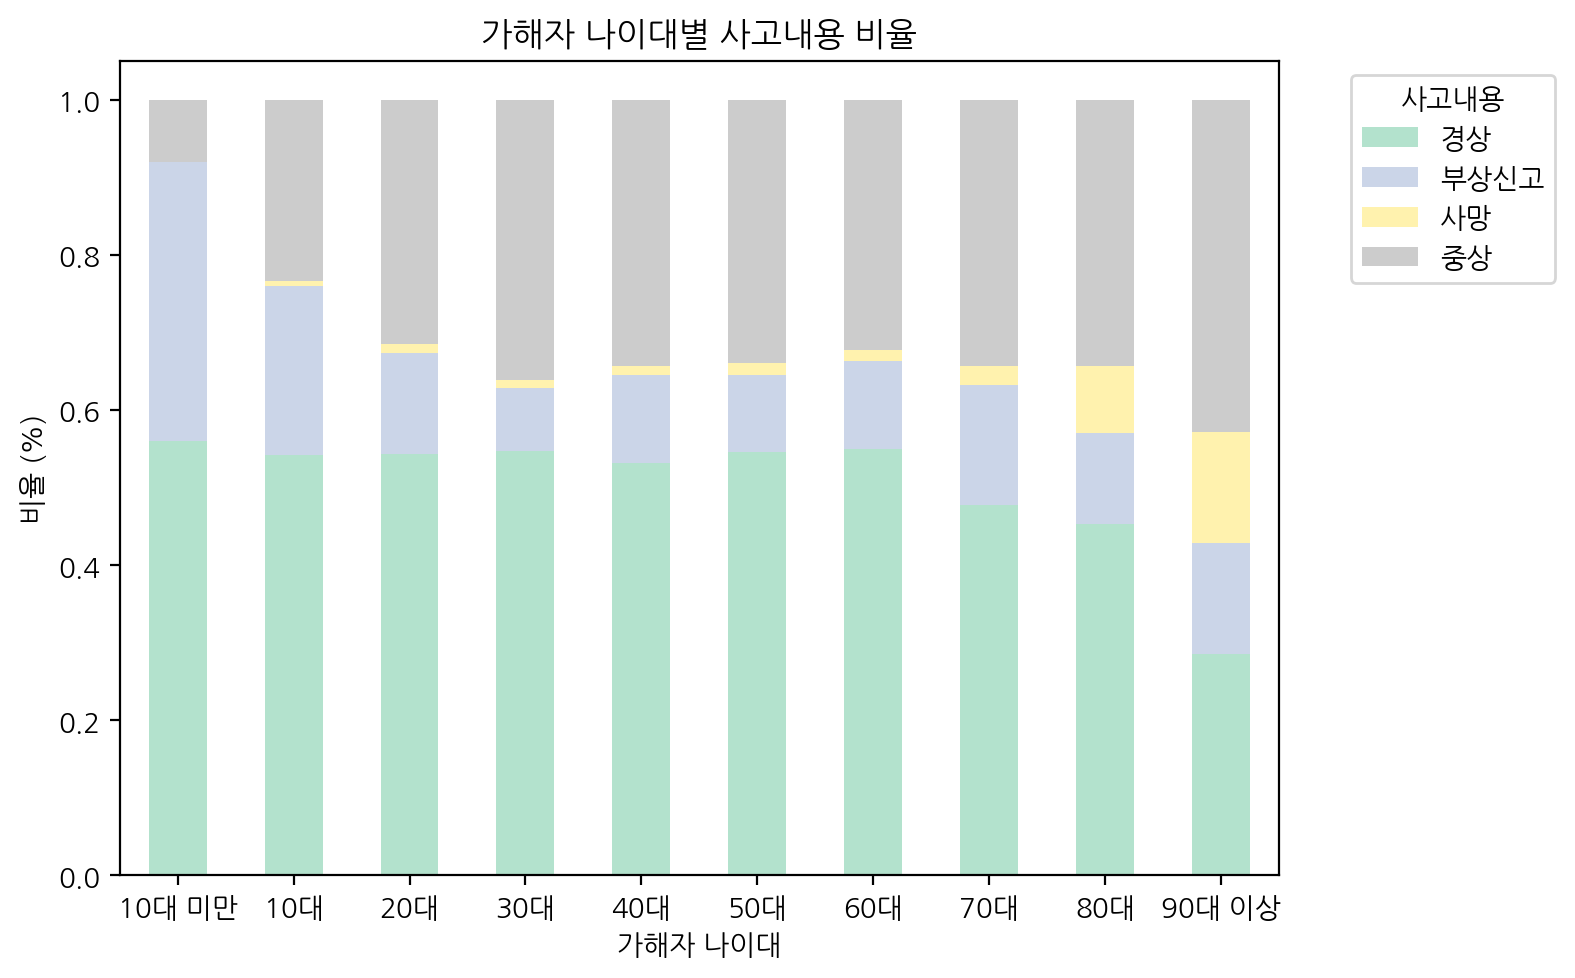

In [97]:
# 나이대별 사고내용 유형 비율 시각화
# 사고 건수가 아니라 각 나이대에서 사고내용이 차지하는 비율

result.plot(kind = 'bar', stacked = True, figsize = (8, 5), colormap = 'Pastel2')
plt.title("가해자 나이대별 사고내용 비율")
plt.xlabel("가해자 나이대")
plt.ylabel("비율 (%)")
plt.legend(title = '사고내용', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.tight_layout()

plt.show()

# 10대 이하는 부상신고, 90대 이상은 중상 비율이 높게 나타남

In [98]:
PvPDamage = df.groupby('prepVehicle', as_index = False)[['prepDamage']].value_counts(normalize=True).sort_values(['prepDamage'])
PvVDamage = df.groupby('prepVehicle', as_index = False)[['victemDamage']].value_counts(normalize=True).sort_values(['prepVehicle'])
# .pivot(index ='prepVehicle', columns = 'victemDamage', values ='count')
PvPDamage

,prepVehicle,prepDamage,proportion
34,화물차,경상,0.01
21,이륜차,경상,0.08
2,개인형이동수단(PM),경상,0.10
25,자전거,경상,0.36
18,원동기장치자전거,경상,0.08
13,승용차,경상,0.00
19,원동기장치자전거,기타불명,0.05
33,화물차,기타불명,0.02
16,승합차,기타불명,0.03
12,승용차,기타불명,0.02


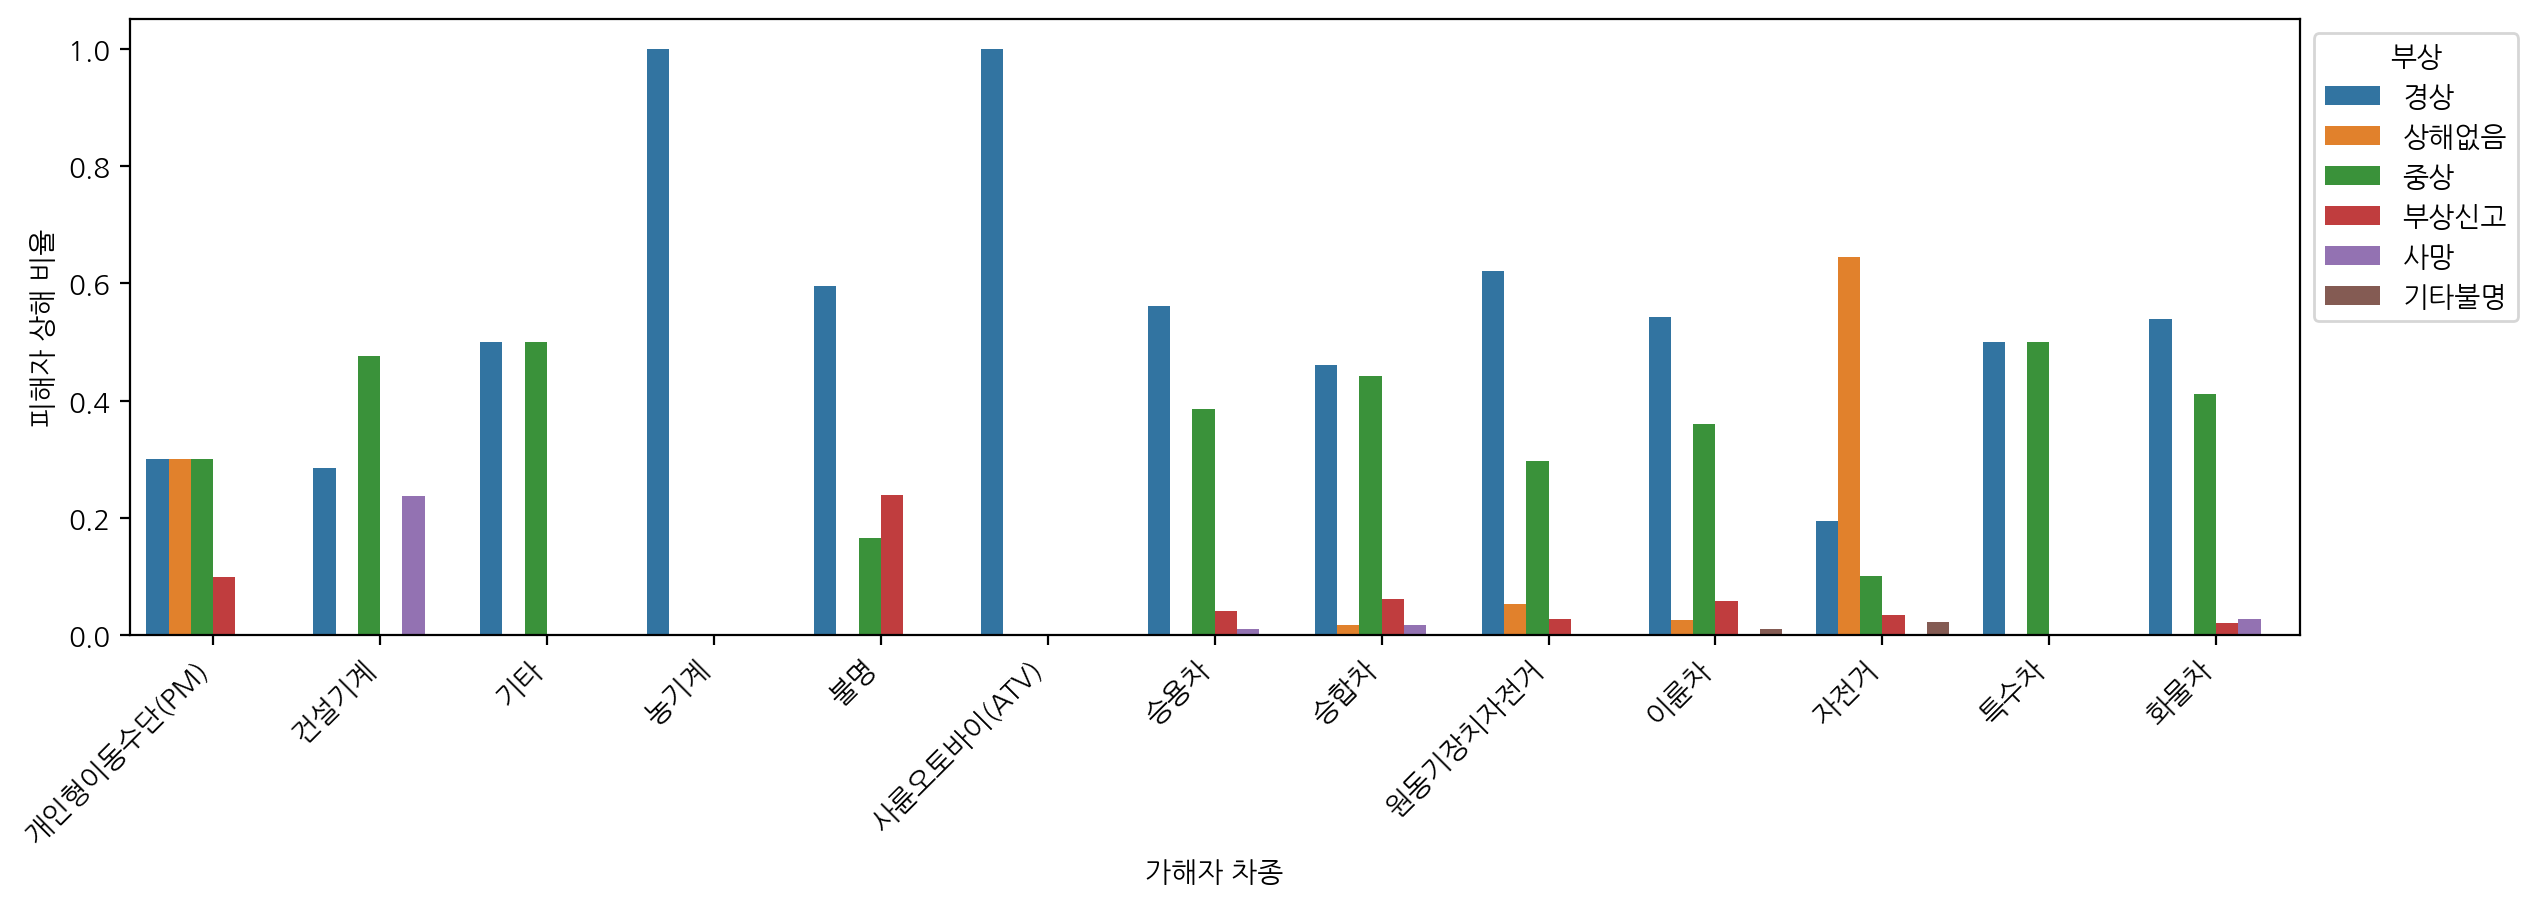

In [99]:
plt.figure(figsize = (14, 4))
sns.barplot(data = PvVDamage, x = 'prepVehicle', y = 'proportion', hue = 'victemDamage')
plt.legend(title = '부상', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.ylabel("피해자 상해 비율")
plt.xlabel("가해자 차종")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

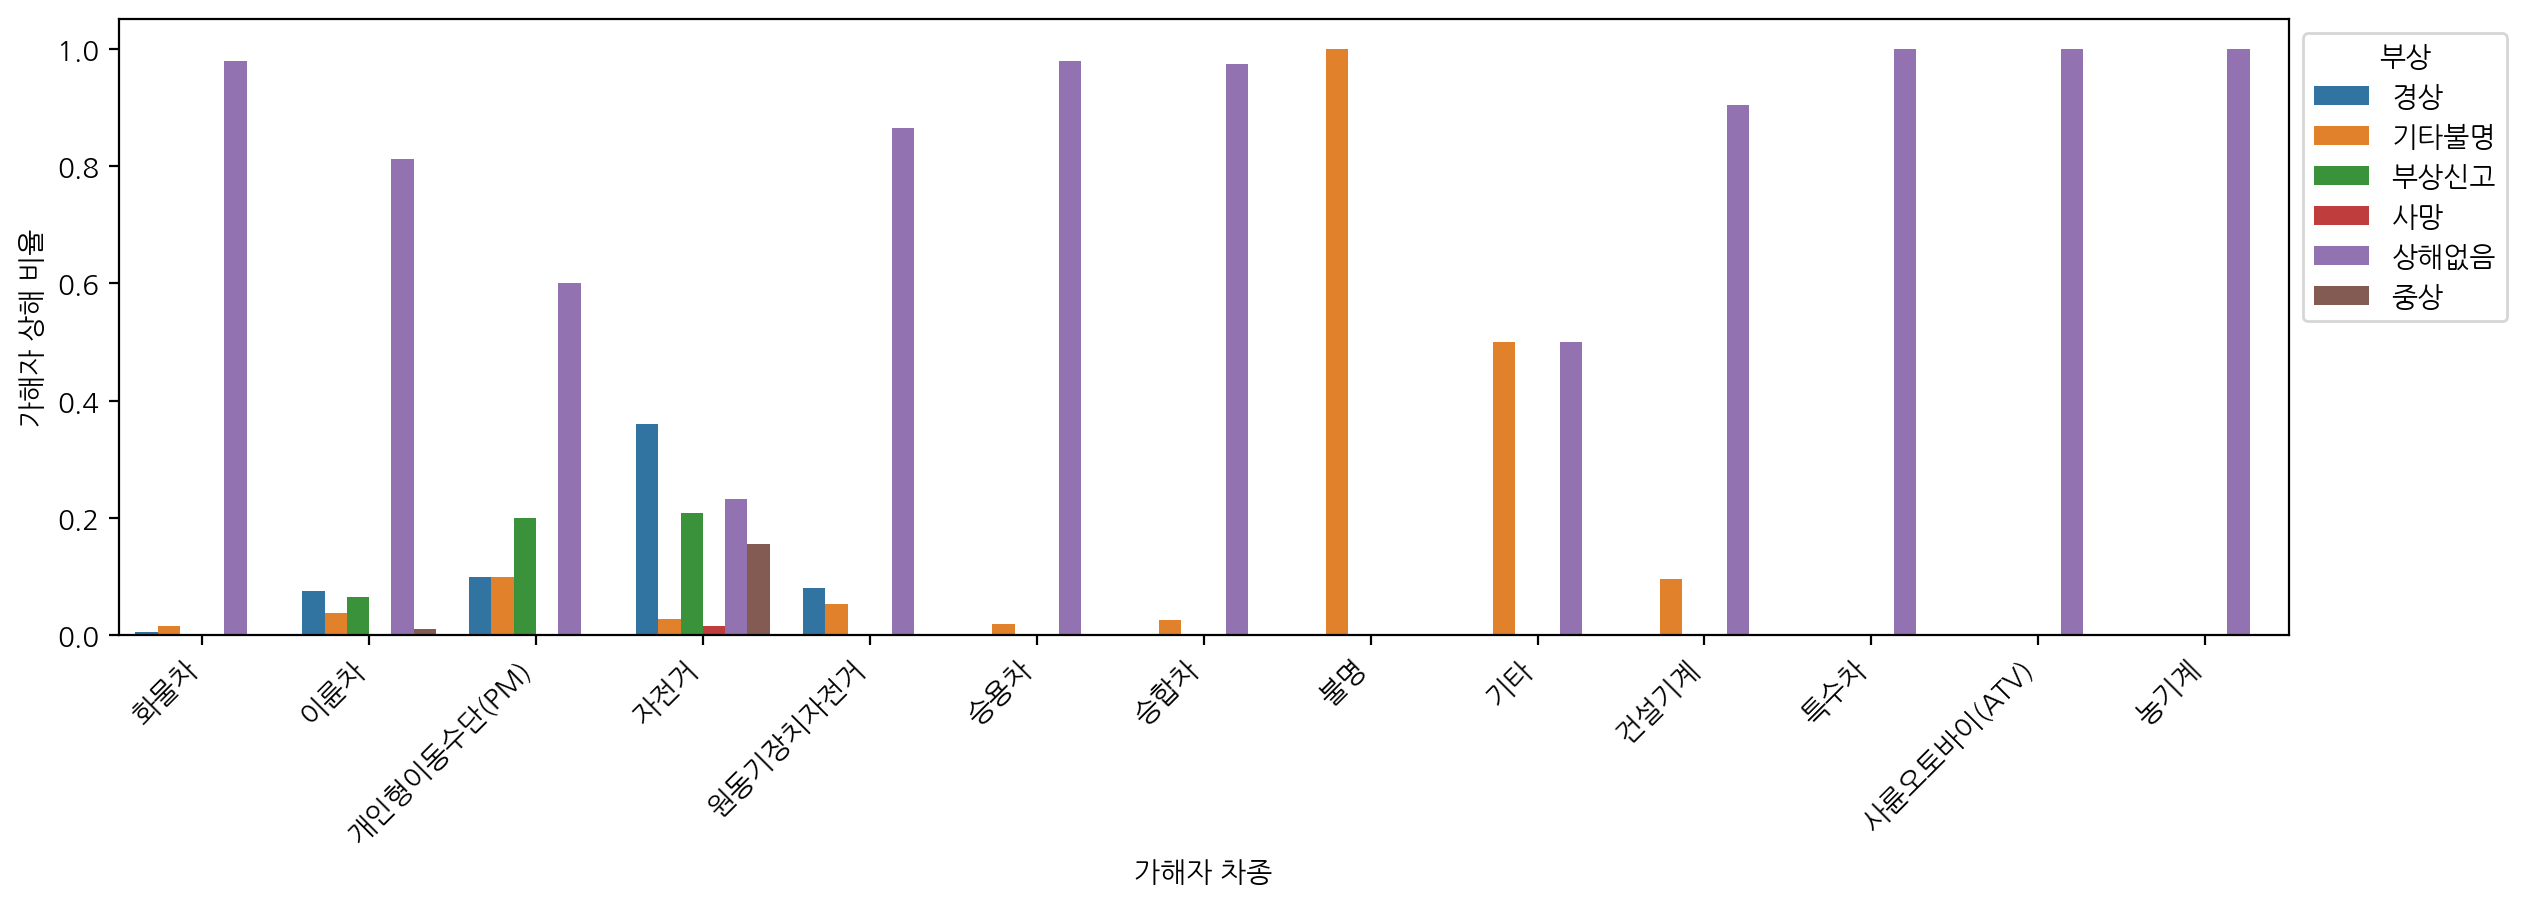

In [100]:
plt.figure(figsize = (14, 4))
sns.barplot(data = PvPDamage, x = 'prepVehicle', y = 'proportion', hue = 'prepDamage')
plt.legend(title = '부상', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.ylabel("가해자 상해 비율")
plt.xlabel("가해자 차종")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [101]:
VvPDamage = df.groupby('victemVehicle', as_index = False)[['prepDamage']].value_counts(normalize=True).sort_values(['victemVehicle'])
VvVDamage = df.groupby('victemVehicle', as_index = False)[['victemDamage']].value_counts(normalize=True).sort_values(['victemVehicle'])

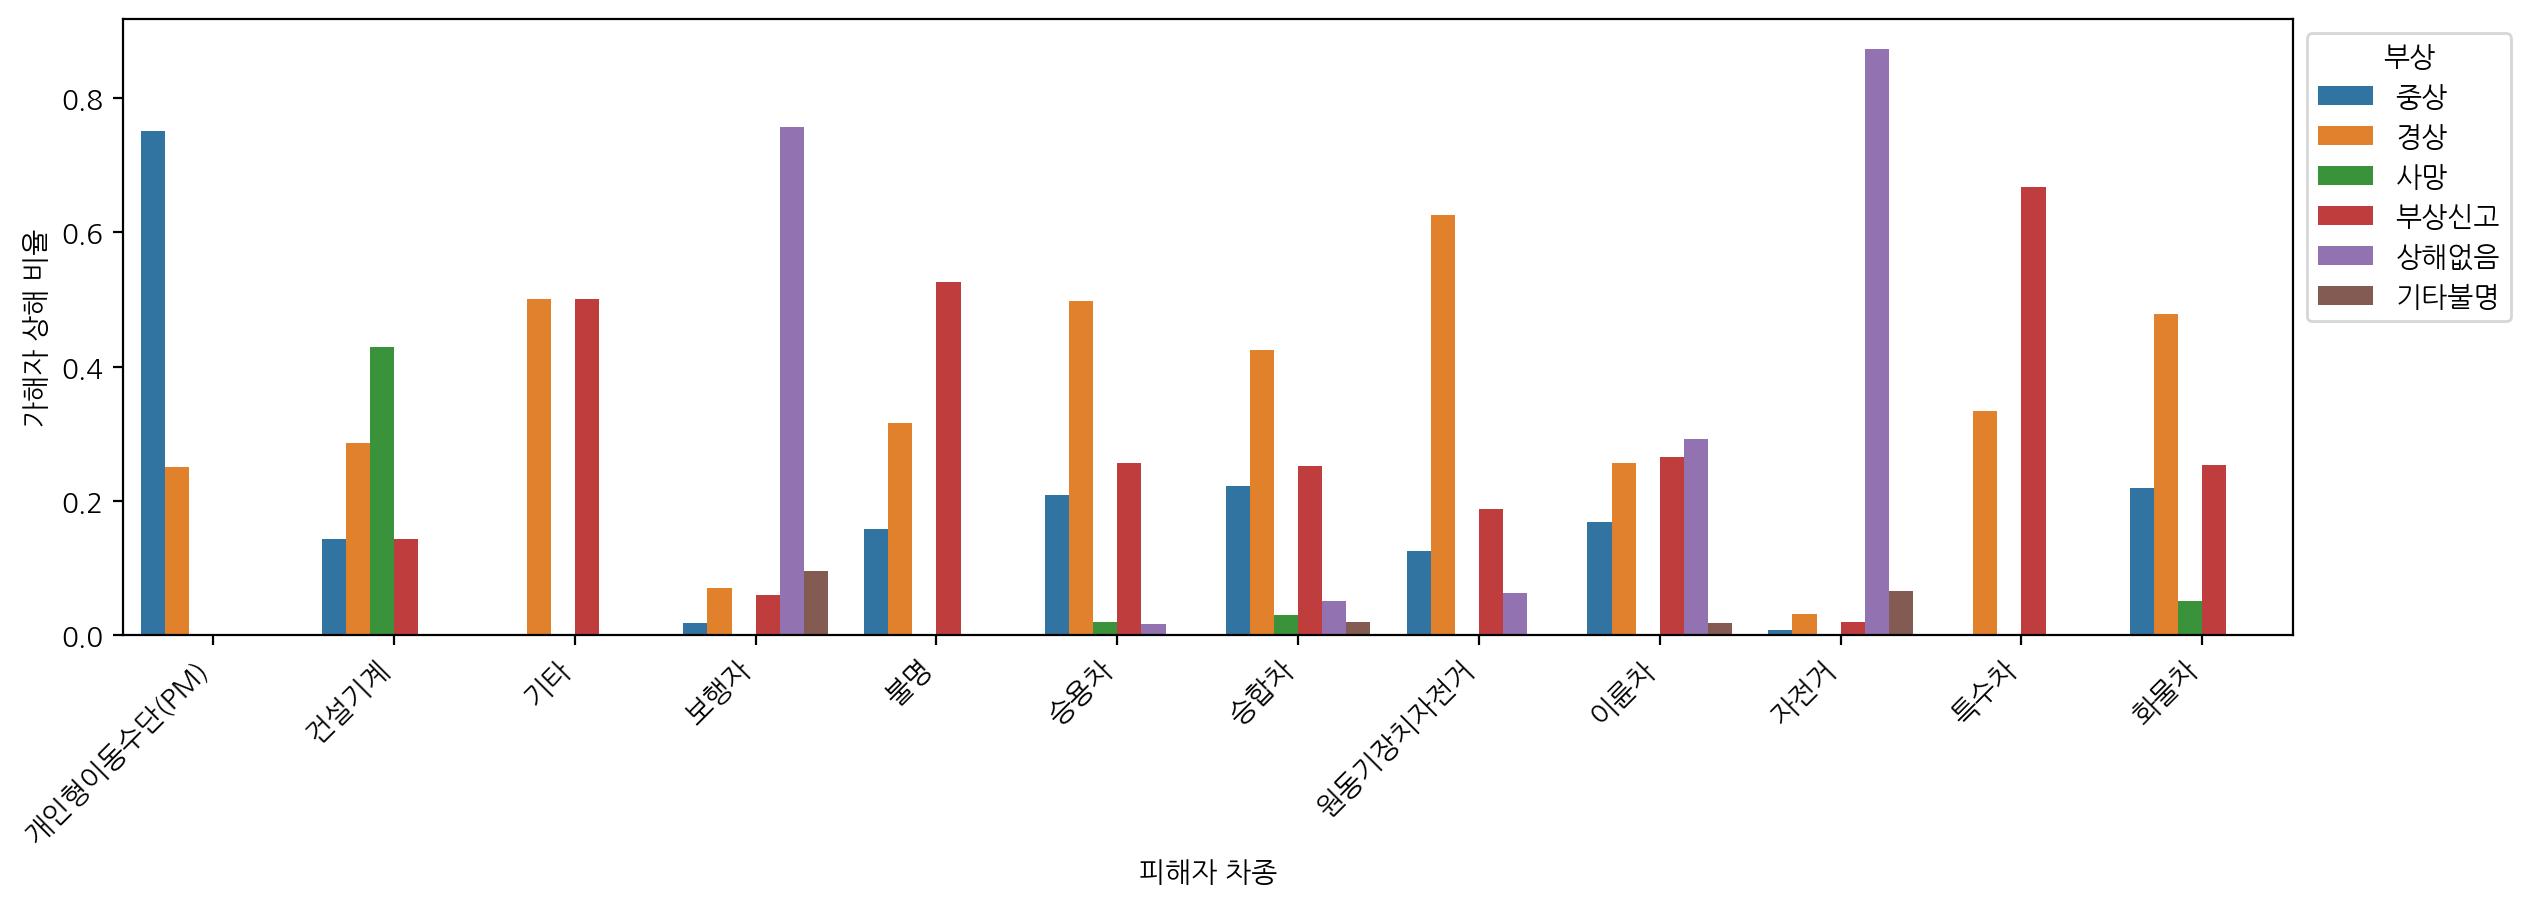

In [102]:
plt.figure(figsize = (14, 4))
sns.barplot(data = VvPDamage, x = 'victemVehicle', y = 'proportion', hue = 'prepDamage')
plt.legend(title = '부상', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.ylabel("가해자 상해 비율")
plt.xlabel("피해자 차종")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

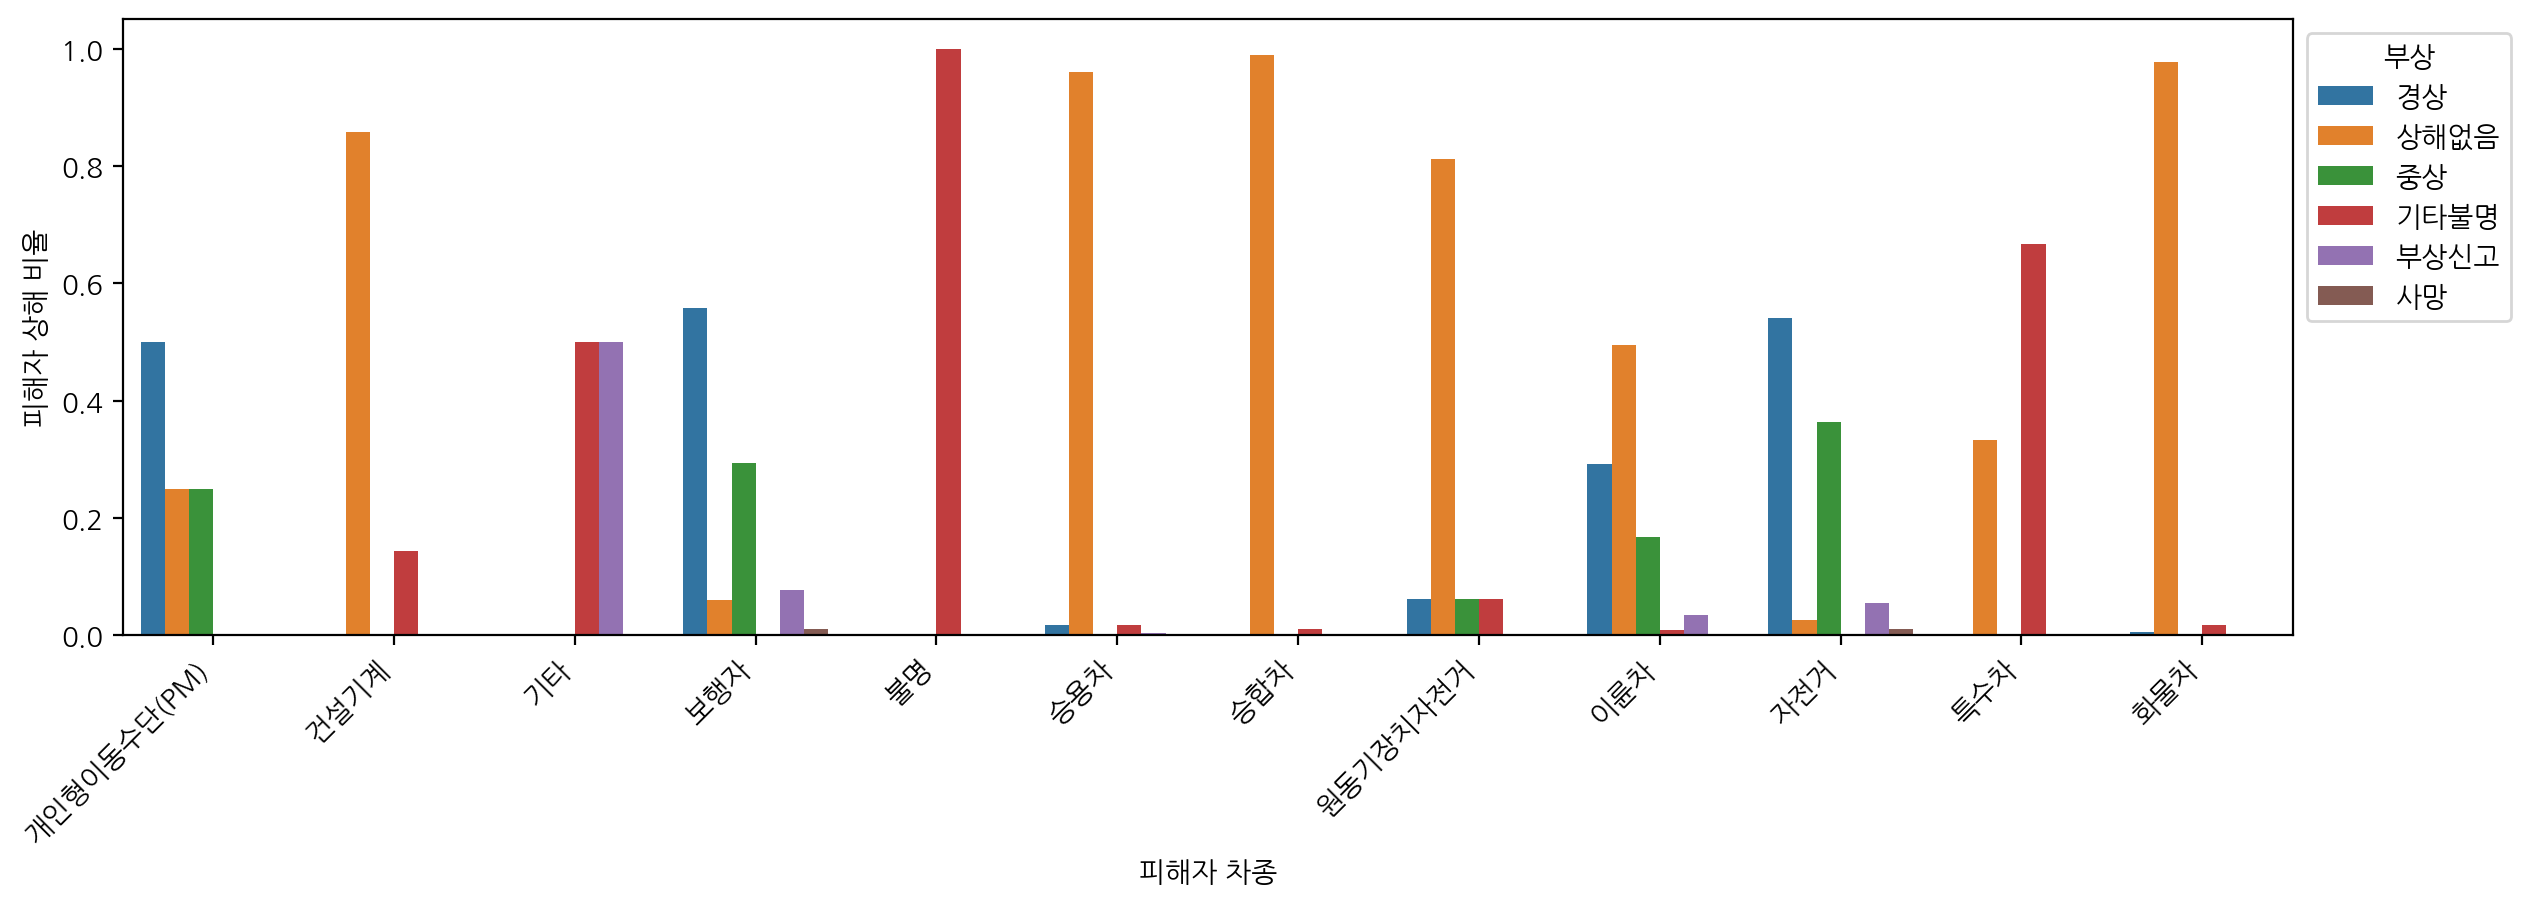

In [103]:
plt.figure(figsize = (14, 4))
sns.barplot(data = VvVDamage, x = 'victemVehicle', y = 'proportion', hue = 'victemDamage')
plt.legend(title = '부상', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.ylabel("피해자 상해 비율")
plt.xlabel("피해자 차종")
plt.xticks(rotation = 45, ha = 'right')
plt.show()